In [8]:
import sagemaker
import boto3

In [2]:
sess = sagemaker.Session()

In [3]:
role = sagemaker.get_execution_role()

In [6]:
sess

In [7]:
role

'arn:aws:iam::640549960621:role/Admin'

In [9]:
iam_client = boto3.client('iam')

In [10]:
iam_client

In [12]:
role = iam_client.get_role(RoleName='Admin')['Role']['Arn']

In [13]:
role

'arn:aws:iam::640549960621:role/Admin'

In [14]:
sess = sagemaker.Session()

In [15]:
sess

In [16]:
from sagemaker.huggingface import HuggingFace


# hyperparameters which are passed to the training job
hyperparameters={'epochs': 1,
                 'per_device_train_batch_size': 32,
                 'model_name_or_path': 'distilbert-base-uncased'
                 }

# create the Estimator
huggingface_estimator = HuggingFace(
        entry_point='train.py',
        source_dir='./scripts',
        instance_type='ml.p3.2xlarge',
        instance_count=1,
        role=role,
        transformers_version='4.4',
        pytorch_version='1.6',
        py_version='py36',
        hyperparameters = hyperparameters
)

In [2]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
import numpy as np

In [324]:
from syne_tune.backend.sagemaker_backend.instance_info import InstanceInfos

In [3]:
df = pd.read_csv('/Users/awgol/code/syne-tune/blackbox_repository/conversion_scripts/scripts/resnet-instance-speed.csv.zip')

In [7]:
df['batch-size'].unique()

array([32.])

In [45]:
instance_info = InstanceInfos()
instance_hourly_cost = {instance: instance_info(instance).cost_per_hour for instance in instance_info.instances}
instance_hourly_cost

{'ml.m5.large': 0.134,
 'ml.c5.xlarge': 0.238,
 'ml.m5.xlarge': 0.269,
 'ml.c4.xlarge': 0.279,
 'ml.m4.xlarge': 0.28,
 'ml.c5n.xlarge': 0.302,
 'ml.c5.2xlarge': 0.476,
 'ml.m5.2xlarge': 0.538,
 'ml.c4.2xlarge': 0.557,
 'ml.m4.2xlarge': 0.56,
 'ml.c5n.2xlarge': 0.605,
 'ml.g4dn.xlarge': 0.736,
 'ml.c5.4xlarge': 0.952,
 'ml.g4dn.2xlarge': 1.053,
 'ml.m5.4xlarge': 1.075,
 'ml.c4.4xlarge': 1.114,
 'ml.m4.4xlarge': 1.12,
 'ml.p2.xlarge': 1.125,
 'ml.c5n.4xlarge': 1.21,
 'ml.g4dn.4xlarge': 1.686,
 'ml.c5.9xlarge': 2.142,
 'ml.c4.8xlarge': 2.227,
 'ml.c5n.9xlarge': 2.722,
 'ml.m4.10xlarge': 2.8,
 'ml.g4dn.8xlarge': 3.046,
 'ml.m5.12xlarge': 3.226,
 'ml.p3.2xlarge': 3.825,
 'ml.c5.18xlarge': 4.284,
 'ml.m4.16xlarge': 4.48,
 'ml.c5n.18xlarge': 5.443,
 'ml.g4dn.12xlarge': 5.477,
 'ml.g4dn.16xlarge': 6.093,
 'ml.m5.24xlarge': 6.451,
 'ml.p2.8xlarge': 8.64,
 'ml.p3.8xlarge': 14.688,
 'ml.p2.16xlarge': 16.56,
 'ml.p3.16xlarge': 28.152}

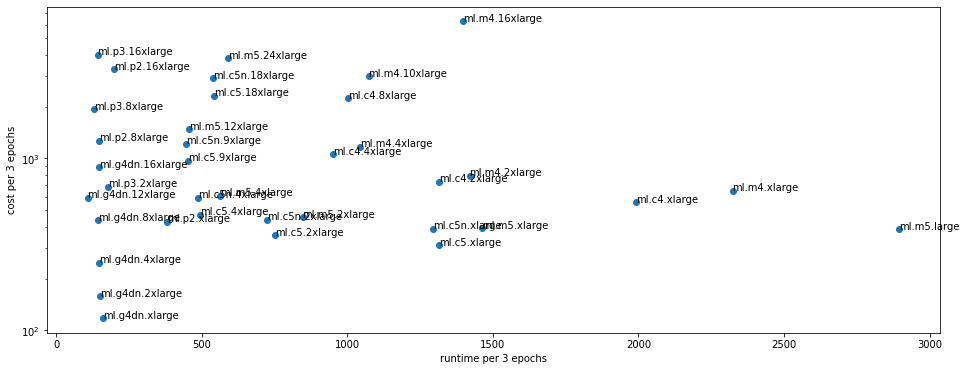

In [42]:
temp = df.groupby("InstanceType").mean()['time'].sort_values()

instance_info = InstanceInfos()
cost = [instance_info(it).cost_per_hour*temp[it] for it in temp.index]



fig, ax = plt.subplots(figsize=(16,6))


ax.scatter(temp, cost)
ax.set_xlabel('runtime per 3 epochs')
ax.set_ylabel('cost per 3 epochs')

ax.set_yscale('log')

for i, text in enumerate(temp.index):
    ax.annotate(text, (temp[i],cost[i]), rotation=0)

In [22]:
temp.index[1]

'ml.p3.8xlarge'

In [19]:
df.groupby("InstanceType").mean()['time'].sort_values()

InstanceType
ml.g4dn.12xlarge     107.975398
ml.p3.8xlarge        131.221631
ml.p3.16xlarge       142.212402
ml.g4dn.8xlarge      143.690435
ml.g4dn.16xlarge     146.283468
ml.g4dn.4xlarge      146.880330
ml.p2.8xlarge        147.018600
ml.g4dn.2xlarge      150.143138
ml.g4dn.xlarge       160.520864
ml.p3.2xlarge        179.494665
ml.p2.16xlarge       199.887695
ml.p2.xlarge         380.107107
ml.c5n.9xlarge       446.677236
ml.c5.9xlarge        453.573029
ml.m5.12xlarge       457.379779
ml.c5n.4xlarge       487.819102
ml.c5.4xlarge        494.101730
ml.c5n.18xlarge      538.611898
ml.c5.18xlarge       541.941635
ml.m5.4xlarge        563.615332
ml.m5.24xlarge       591.923767
ml.c5n.2xlarge       725.734436
ml.c5.2xlarge        751.791382
ml.m5.2xlarge        846.326758
ml.c4.4xlarge        950.850830
ml.c4.8xlarge       1002.853800
ml.m4.4xlarge       1043.883652
ml.m4.10xlarge      1073.171021
ml.c5n.xlarge       1295.629354
ml.c5.xlarge        1314.467865
ml.c4.2xlarge       1315.91

In [50]:
import matplotlib.pyplot as plt

In [1]:
import boto3
from datetime import datetime, timedelta
import time

cloudwatch = boto3.resource('cloudwatch')

In [3]:
metric = cloudwatch.Metric("/aws/sagemaker/TrainingJobs", 'GPUMemoryUtilization')

In [22]:
dimensions = [{'Name': 'Host', 'Value': 'distilbert-on-imdb-2022-02-01-19-40-16-594-0/algo-1'}]

In [41]:
datetime(2022, 2, 2, 18, 1)

datetime.datetime(2022, 2, 2, 18, 1)

In [46]:
response = metric.get_statistics(
    Dimensions=dimensions,
    StartTime=datetime(2022, 2, 1, 18, 0),
    EndTime=datetime(2022, 2, 1, 23, 0),
    Period=60,
    Statistics=['Maximum',],
#     ExtendedStatistics=['string',],
#     Unit='None'
)

In [49]:
x = []
y = []
for datapoint in response['Datapoints']:
    x.append(datapoint['Timestamp'])
    y.append(datapoint['Maximum'])

In [5]:
boto3.__version__

'1.20.46'

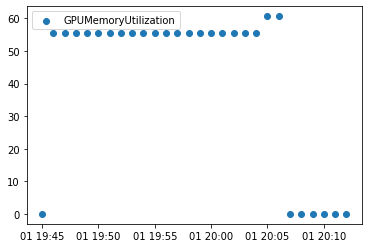

In [56]:
plt.scatter(x, y, label='GPUMemoryUtilization')
plt.legend()

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/cloudwatch.html#CloudWatch.Metric.get_statistics

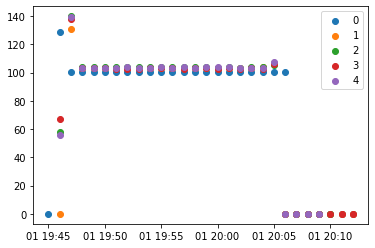

In [60]:
cloudwatch = boto3.resource('cloudwatch')
metric_name = 'CPUUtilization'
for i in range(5):
    dimensions = [{'Name': 'Host', 'Value': f'distilbert-on-imdb-2022-02-01-19-40-16-594-{i}/algo-1'}]
    metric = cloudwatch.Metric("/aws/sagemaker/TrainingJobs", metric_name)
    response = metric.get_statistics(
        Dimensions=dimensions,
        StartTime=datetime(2022, 2, 1, 18, 0),
        EndTime=datetime(2022, 2, 1, 23, 0),
        Period=60,
        Statistics=['Maximum',],
    )
    x = []
    y = []
    for datapoint in response['Datapoints']:
        x.append(datapoint['Timestamp'])
        y.append(datapoint['Maximum'])
    plt.scatter(x, y, label=i)
plt.legend()

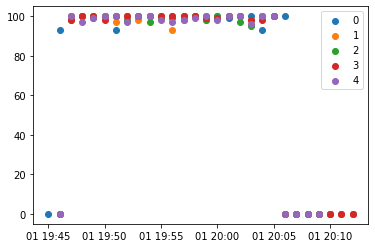

In [61]:
cloudwatch = boto3.resource('cloudwatch')
metric_name = 'GPUUtilization'
for i in range(5):
    dimensions = [{'Name': 'Host', 'Value': f'distilbert-on-imdb-2022-02-01-19-40-16-594-{i}/algo-1'}]
    metric = cloudwatch.Metric("/aws/sagemaker/TrainingJobs", metric_name)
    response = metric.get_statistics(
        Dimensions=dimensions,
        StartTime=datetime(2022, 2, 1, 18, 0),
        EndTime=datetime(2022, 2, 1, 23, 0),
        Period=60,
        Statistics=['Maximum',],
    )
    x = []
    y = []
    for datapoint in response['Datapoints']:
        x.append(datapoint['Timestamp'])
        y.append(datapoint['Maximum'])
    plt.scatter(x, y, label=i)
plt.legend()

In [2]:
from sagemaker import TrainingJobAnalytics

# Captured metrics can be accessed as a Pandas dataframe
df = TrainingJobAnalytics(training_job_name='dataloader-num-workers-2022-02-01-21-39-14-236-0').dataframe()
df.head(10)

""


In [5]:
TrainingJobAnalytics(training_job_name='dataloader-num-workers-2022-02-01-21-39-14-236-0').metadata()

AttributeError: 'TrainingJobAnalytics' object has no attribute 'metadata'

In [16]:
paginator = cloudwatch.get_paginator('list_metrics')
for response in paginator.paginate(Dimensions=[{'Name': 'Host', 'Value': 'distilbert-on-imdb-2022-02-01-19-40-16-594-0/algo-1'},],
                                   MetricName='GPUMemoryUtilization',
                                   Namespace="/aws/sagemaker/TrainingJobs"):
    print(response['Metrics'])

[{'Namespace': '/aws/sagemaker/TrainingJobs', 'MetricName': 'GPUMemoryUtilization', 'Dimensions': [{'Name': 'Host', 'Value': 'distilbert-on-imdb-2022-02-01-19-40-16-594-0/algo-1'}]}]


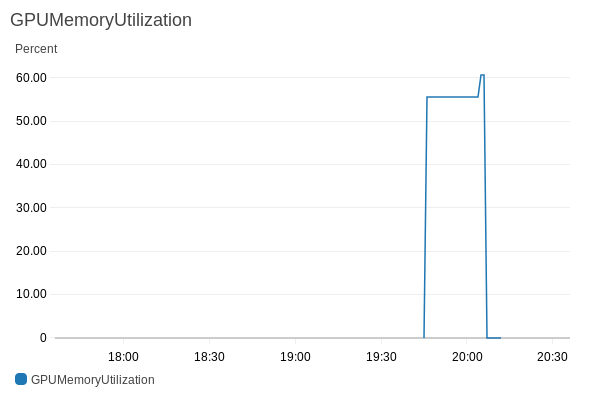

In [51]:
import boto3
from PIL import Image
from io import BytesIO

widget = '''{
    "metrics": [
        [ "/aws/sagemaker/TrainingJobs", "GPUMemoryUtilization", "Host", "distilbert-on-imdb-2022-02-01-19-40-16-594-0/algo-1", { "id": "m1" } ]
    ],
    "region": "us-west-2",
    "title": "GPUMemoryUtilization",
    "view": "timeSeries",
    "stacked": false,
    "stat": "Maximum",
    "period": 60
}'''

client = boto3.client('cloudwatch')

response = client.get_metric_widget_image(
    MetricWidget=widget
)

Image.open(BytesIO(response['MetricWidgetImage']))

In [174]:
df = TrainingJobAnalytics('keep-in-memory-true-2022-02-02-16-35-35-913-2').dataframe()
df

,timestamp,metric_name,value
0,0.0,loss,0.346738
1,60.0,loss,0.347796
2,120.0,loss,0.206303
3,180.0,loss,0.200430
4,0.0,learning_rate,5.843917
5,60.0,learning_rate,2.921959
6,120.0,learning_rate,0.000000
7,0.0,epoch,0.206667
8,60.0,epoch,0.420000
9,120.0,epoch,0.710000


In [102]:
from sagemaker.analytics import TrainingJobAnalytics

In [108]:
df = TrainingJobAnalytics('keep-in-memory-true-2022-02-01-21-20-34-290-0').dataframe()

In [109]:
df

,timestamp,metric_name,value
0,0.0,accuracy,0.75


In [3]:
import sys
import importlib

sys.path.append('/Users/awgol/code/syne-tune')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

<module 'syne_tune.experiments' from '/Users/awgol/code/syne-tune/syne_tune/experiments.py'>

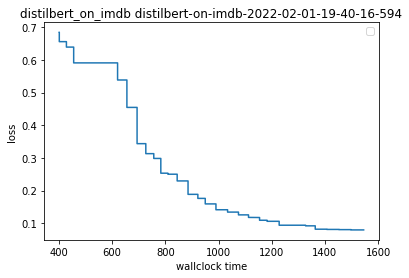

In [84]:
tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
tuning_experiment.plot()

In [94]:
tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
tuning_experiment.results

,loss,learning_rate,epoch,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_dataloader_num_workers,config_epochs,config_learning_rate,config_max_steps,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time
0,0.6850,9.996801e-07,0.00,1.643745e+09,11.808134,0.002414,0,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,401.076485
1,0.7162,9.993602e-07,0.00,1.643745e+09,12.477326,0.002551,1,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,401.084368
2,0.7117,9.990403e-07,0.00,1.643745e+09,13.144443,0.002687,2,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,401.084415
3,0.7024,9.987204e-07,0.00,1.643745e+09,13.815938,0.002825,3,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,401.084446
4,0.6821,9.984005e-07,0.00,1.643745e+09,14.488657,0.002962,4,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,401.084467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.6290,5.166347e-07,0.97,1.643746e+09,1128.394503,0.230694,1510,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,1545.964228
7763,0.3534,5.163148e-07,0.97,1.643746e+09,1129.149216,0.230848,1511,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,1545.964241
7764,0.2897,5.159949e-07,0.97,1.643746e+09,1129.901125,0.231002,1512,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,1545.964253
7765,0.0842,5.156750e-07,0.97,1.643746e+09,1130.652549,0.231156,1513,CONTINUE,InProgress,0,0,2,0.000001,15,/opt/ml/checkpoints,1,ml.g4dn.xlarge,0.000001,1545.964266


<AxesSubplot:xlabel='st_worker_time', ylabel='loss'>

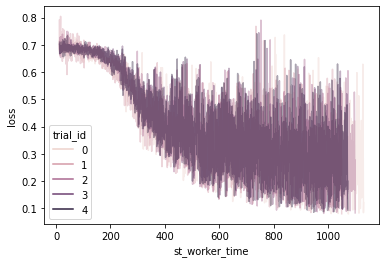

In [97]:
tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
sns.lineplot(data=tuning_experiment.results, 
             hue="trial_id", x="st_worker_time", y="loss", alpha=0.4)

<AxesSubplot:xlabel='epoch', ylabel='mean_loss'>

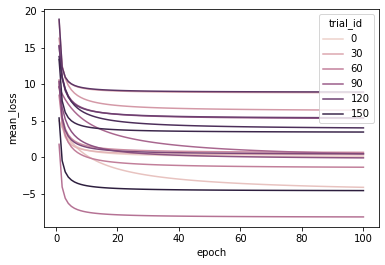

In [80]:
tuning_experiment = syne_tune.experiments.load_experiment('height-tuning-2022-01-18-15-01-47-599')
sns.lineplot(data=tuning_experiment.results[tuning_experiment.results.trial_id % 10 == 0], 
             hue="trial_id", x="epoch", y="mean_loss")

## Investigating results of the experiments on 01 Feb

In [139]:
job1 = 'keep-in-memory-true-2022-02-02-13-44-30-699'
job2 = 'dataloader-num-workers-2022-02-02-13-45-09-268'

In [140]:
cloudwatch = boto3.resource('cloudwatch')

In [165]:
sagemaker_boto3 = boto3.client('sagemaker')

GPU/CPU Utilization for the dataloader-num-workers experiment

In [171]:
def plot(metric_name, statistic, job_name, number_of_jobs):
    for i in range(number_of_jobs):
        job_details = sagemaker_boto3.describe_training_job(TrainingJobName=f'{job_name}-{i}')
        dimensions = [{'Name': 'Host', 'Value': f'{job_name}-{i}/algo-1'}]
        metric = cloudwatch.Metric("/aws/sagemaker/TrainingJobs", metric_name)
        response = metric.get_statistics(
            Dimensions=dimensions,
            StartTime=job_details['TrainingStartTime'],
            EndTime=job_details['TrainingEndTime'],
            Period=60,
            Statistics=[statistic,],
        )
        x = []
        y = []
        for datapoint in response['Datapoints']:
            x.append(datapoint['Timestamp'])
            y.append(datapoint[statistic])
        plt.scatter(x, y, label=i)
    plt.legend()
    plt.title(statistic + ' ' + metric_name)
    _ = plt.ylabel(statistic + ' ' + metric_name)

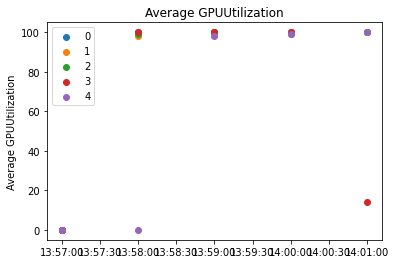

In [172]:
metric_name = 'GPUUtilization'
statistic = 'Average'  #, 'Maximum'
job_name = job2
number_of_jobs = 5

plot(metric_name, statistic, job_name, number_of_jobs)

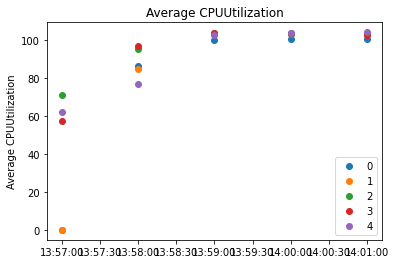

In [173]:
metric_name = 'CPUUtilization'
statistic = 'Average'  #, 'Maximum'
job_name = job2
number_of_jobs = 5

plot(metric_name, statistic, job_name, number_of_jobs)

elapsed_time for all the jobs

In [160]:
elapsed_times = []
for i in range(4):
    df = TrainingJobAnalytics(f'{job2}-{i}').dataframe()
    elapsed_times.append(df[df.metric_name=='elapsed_time'].value[0])
elapsed_times

[219.69, 226.34, 215.32, 219.0]

In [161]:
df = TrainingJobAnalytics(f'{job1}-0').dataframe()
df[df.metric_name=='elapsed_time'].value[0]

210.82

# Temp

In [175]:
TrainingJobAnalytics('test-log-100-2022-02-04-12-07-09-408-0').dataframe()

,timestamp,metric_name,value
0,0.0,loss,0.692400
1,120.0,loss,0.686000
2,180.0,loss,0.676700
3,240.0,loss,0.662085
4,0.0,learning_rate,7.395833
5,120.0,learning_rate,4.791667
6,180.0,learning_rate,2.187500
7,0.0,epoch,0.260000
8,120.0,epoch,0.520000
9,180.0,epoch,0.780000


# Extract CloudWatch data for runs and save them to csv files

In [1]:
import sys
import importlib

sys.path.append('/Users/awgol/code/syne-tune')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

from syne_tune.util import experiment_path, s3_experiment_path
importlib.reload(syne_tune.util)

import adam_scripts.utils
importlib.reload(adam_scripts.utils)

import numpy as np
import pandas as pd
import tqdm
import boto3

In [12]:
boto3_client_sagemaker = boto3.client('sagemaker')
boto3_resource_cloudwatch = boto3.resource('cloudwatch')

In [13]:
# (metric name, 1-min-window aggregation statistic ['Average', 'Maximum'], entire-training aggregation function)

fields_to_extract = [
    ('CPUUtilization', 'Average', np.max),
    ('MemoryUtilization', 'Average', np.max),
    ('GPUUtilization', 'Average', np.max),
    ('GPUMemoryUtilization', 'Average', np.max),
]

In [14]:
tuner_job_name = 'speed-bs-it-2022-02-07-23-12-47-916'
df = adam_scripts.utils.download_cloudwatch_metrics_and_save_to_csv(
    tuner_job_name, fields_to_extract, boto3_client_sagemaker, boto3_resource_cloudwatch)

File found on S3


In [268]:
tuner_job_name = 'loss-lr-wd-bs-2-2022-02-07-23-13-30-781'
df2 = adam_scripts.utils.download_cloudwatch_metrics_and_save_to_csv(
    tuner_job_name, fields_to_extract, boto3_client_sagemaker, boto3_resource_cloudwatch)

Processing loss-lr-wd-bs-2-2022-02-07-23-13-30-781
Skipping the failed or missing trial_ids: set()


100%|███████████████████████████████████████████████████████████████████████████████████████████| 40/40 [02:11<00:00,  3.29s/it]


In [269]:
tuner_job_name = 'loss-lr-wd-bs-2022-02-04-12-09-26-911'
df3 = adam_scripts.utils.download_cloudwatch_metrics_and_save_to_csv(
    tuner_job_name, fields_to_extract, boto3_client_sagemaker, boto3_resource_cloudwatch)

Processing loss-lr-wd-bs-2022-02-04-12-09-26-911
Skipping the failed or missing trial_ids: set()


100%|███████████████████████████████████████████████████████████████████████████████████████████| 45/45 [02:19<00:00,  3.10s/it]


In [ ]:
tuner_job_name = 'speed-bs-it-nw-new-2022-02-21-18-05-01-921'
df4 = adam_scripts.utils.download_cloudwatch_metrics_and_save_to_csv(
    tuner_job_name, fields_to_extract, boto3_client_sagemaker, boto3_resource_cloudwatch)

In [404]:
df3.head()

,tuner_job_name,trial_id,CPUUtilization,MemoryUtilization,GPUUtilization,GPUMemoryUtilization
0,loss-lr-wd-bs-2022-02-04-12-09-26-911,2,146.913,13.1181,100.0,38.6260
1,loss-lr-wd-bs-2022-02-04-12-09-26-911,0,147.390,13.0687,100.0,44.5298
2,loss-lr-wd-bs-2022-02-04-12-09-26-911,4,149.320,12.2205,100.0,52.6971
3,loss-lr-wd-bs-2022-02-04-12-09-26-911,1,149.488,12.1858,100.0,52.6971
4,loss-lr-wd-bs-2022-02-04-12-09-26-911,3,146.877,13.0645,100.0,60.4540


# Investigating NAS201Cloud resnet-instance-speed.csv 

In [270]:
# df = pd.read_csv(
#     '/Users/awgol/code/syne-tune/blackbox_repository/conversion_scripts/scripts/resnet-instance-speed.csv.zip')

This only runs on the `speed-bs-it` runs

In [217]:
tuner_job_name = 'speed-bs-it-2022-02-07-23-12-47-916'

In [218]:
tuning_experiment_results = syne_tune.experiments.load_experiment(tuner_job_name)

In [219]:
dfr = tuning_experiment_results.results

In [221]:
metric_train_runtime = []
for trial_id in tqdm.tqdm(dfr.trial_id):
    temp = TrainingJobAnalytics(
        f'{tuner_job_name}-{trial_id}', metric_names=['train_runtime']).dataframe()
    metric_train_runtime.append(temp.iloc[0,2])

  0%|                                                                                                                                                        | 0/116 [00:02<?, ?it/s]


IndexError: single positional indexer is out-of-bounds

In [410]:
dfr['train_runtime'] = metric_train_runtime

In [413]:
dfr.to_csv(s3_experiment_path(tuner_name=tuner_job_name) + '/train_runtime.csv')

In [522]:
dfr = pd.read_csv(s3_experiment_path(tuner_name=tuner_job_name) + '/train_runtime.csv')

In [516]:
dfr.groupby('config_st_instance_type').train_runtime.min()

config_st_instance_type
ml.g4dn.12xlarge     79.8027
ml.g4dn.2xlarge     251.0867
ml.g4dn.4xlarge     258.5960
ml.g4dn.8xlarge     251.7422
ml.g4dn.xlarge      248.7390
ml.g5.12xlarge       38.8969
ml.g5.24xlarge       39.0461
ml.g5.2xlarge        89.5669
ml.g5.4xlarge        89.4432
ml.g5.8xlarge        88.9444
ml.g5.xlarge         90.5427
ml.p2.8xlarge        89.3782
ml.p2.xlarge        557.1326
ml.p3.2xlarge        98.9203
Name: train_runtime, dtype: float64

In [520]:
dfr.groupby('config_st_instance_type')[time_col].min().sort_values()

config_st_instance_type
ml.g5.12xlarge       38.8969
ml.g5.24xlarge       39.0461
ml.g4dn.12xlarge     79.8027
ml.g5.8xlarge        88.9444
ml.p2.8xlarge        89.3782
ml.g5.4xlarge        89.4432
ml.g5.2xlarge        89.5669
ml.g5.xlarge         90.5427
ml.p3.2xlarge        98.9203
ml.g4dn.xlarge      248.7390
ml.g4dn.2xlarge     251.0867
ml.g4dn.8xlarge     251.7422
ml.g4dn.4xlarge     258.5960
ml.p2.xlarge        557.1326
Name: train_runtime, dtype: float64

In [517]:
time_col = 'train_runtime'

# Plot cost vs runtime

In [13]:
# https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python

# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

In [14]:
import matplotlib.pyplot as plt

In [523]:
dfr.st_worker_cost = dfr.st_worker_cost/dfr.st_worker_cost.min()
dfr.st_worker_time = dfr.st_worker_time/dfr.st_worker_time.min()

In [524]:
dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]

,Unnamed: 0,step,loss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,...,config_n_eval_data,config_n_train_data,config_per_device_eval_batch_size,config_per_device_train_batch_size,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time,train_runtime
27,27,51,0.6920,1.644280e+09,1.000000,2.502896,0,CONTINUE,InProgress,31,...,32,6144,32,30,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,3935.644227,39.3636
44,44,192,0.6816,1.644281e+09,2.252659,1.000000,0,CONTINUE,InProgress,48,...,32,6144,32,32,/opt/ml/checkpoints,1,ml.g5.xlarge,0.000001,5831.506208,90.5427
105,105,192,0.6896,1.644288e+09,2.239652,1.604993,0,CONTINUE,InProgress,116,...,32,6144,32,32,/opt/ml/checkpoints,1,ml.g5.4xlarge,0.000001,12772.983621,89.5060


Text(0.5, 0, 'cost')

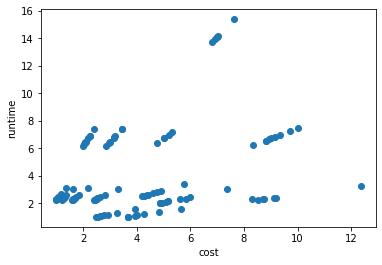

In [525]:
plt.scatter(dfr.st_worker_cost, dfr.st_worker_time)
plt.ylabel('runtime')
plt.xlabel('cost')

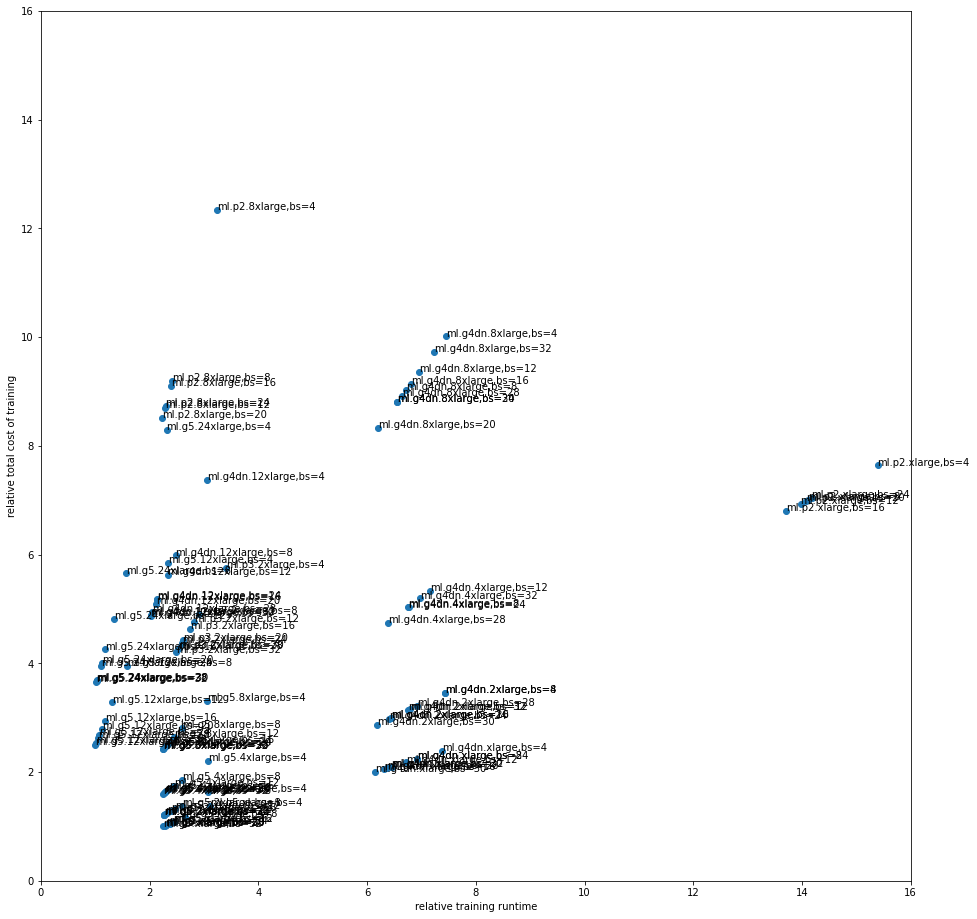

In [539]:
# dfrt = dfr[dfr.config_st_instance_type.str.startswith('ml.g5.xlarge')]
dfrt = dfr

fig, ax = plt.subplots(figsize=(16,16))

ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost)
ax.set_xlabel('relative training runtime')
ax.set_ylabel('relative total cost of training')

# ax.set_yscale('log')
# ax.set_xscale('log')

for i, row in dfrt.iterrows():
    ax.annotate(f"{row.config_st_instance_type},bs={row.config_per_device_train_batch_size}", 
                (row.st_worker_time, row.st_worker_cost), rotation=0)


# dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
# ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

ax.set_ylim([0., 16.])
ax.set_xlim([0., 16.])
ax.set_aspect('equal')

dfrt.config_st_instance_type

fig.patch.set_facecolor('white')

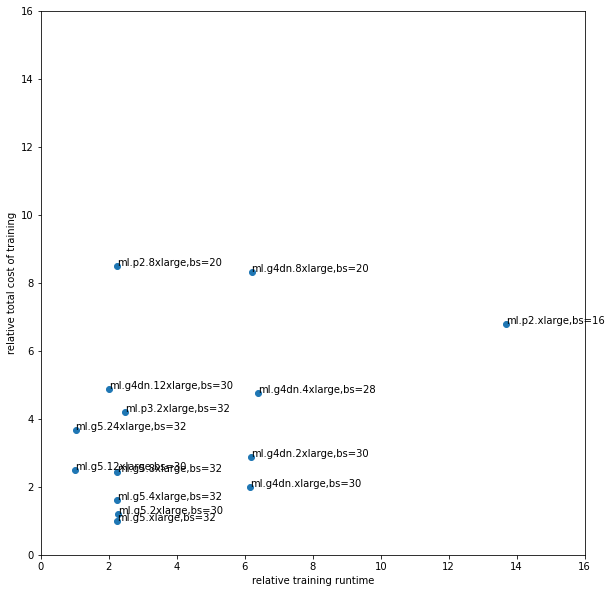

In [538]:
# dfrt = dfr[dfr.config_st_instance_type.str.startswith('ml.g5.xlarge')]
idx = dfr.groupby('config_st_instance_type').st_worker_cost.idxmin()
dfrt = dfr.iloc[idx]

fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost)
ax.set_xlabel('relative training runtime')
ax.set_ylabel('relative total cost of training')

# ax.set_yscale('log')
# ax.set_xscale('log')

for i, row in dfrt.iterrows():
    ax.annotate(f"{row.config_st_instance_type},bs={row.config_per_device_train_batch_size}", 
                (row.st_worker_time, row.st_worker_cost), rotation=0)


# dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
# ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

ax.set_ylim([0., 16.])
ax.set_xlim([0., 16.])
ax.set_aspect('equal')

dfrt.config_st_instance_type

fig.patch.set_facecolor('white')

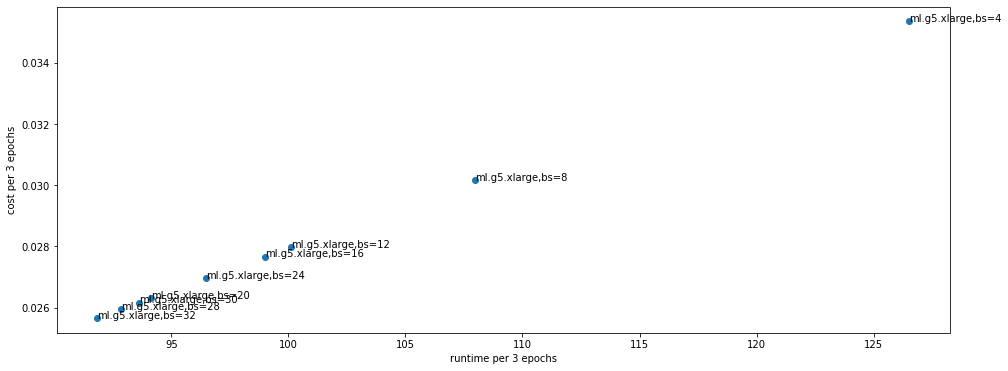

In [443]:
dfrt = dfr[dfr.config_st_instance_type.str.startswith('ml.g5.xlarge')]
# dfrt = dfr

fig, ax = plt.subplots(figsize=(16,6))

ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost)
ax.set_xlabel('runtime per 3 epochs')
ax.set_ylabel('cost per 3 epochs')

# ax.set_yscale('log')
# ax.set_xscale('log')

for i, row in dfrt.iterrows():
    ax.annotate(f"{row.config_st_instance_type},bs={row.config_per_device_train_batch_size}", 
                (row.st_worker_time, row.st_worker_cost), rotation=0)

In [546]:
dfr.columns

Index(['Unnamed: 0', 'step', 'loss', 'st_worker_timestamp', 'st_worker_time',
       'st_worker_cost', 'st_worker_iter', 'st_decision', 'st_status',
       'trial_id', 'config_dataloader_num_workers', 'config_epochs',
       'config_eval_interval', 'config_learning_rate', 'config_log_interval',
       'config_max_resource_level', 'config_n_eval_data',
       'config_n_train_data', 'config_per_device_eval_batch_size',
       'config_per_device_train_batch_size', 'config_st_checkpoint_dir',
       'config_st_instance_count', 'config_st_instance_type',
       'config_weight_decay', 'st_tuner_time', 'train_runtime'],
      dtype='object')

In [552]:
(dfr.groupby(['config_st_instance_type', 'config_per_device_train_batch_size']).train_runtime.count() > 1)

config_st_instance_type  config_per_device_train_batch_size
ml.g4dn.12xlarge         4                                     False
                         8                                     False
                         12                                    False
                         16                                    False
                         20                                    False
                                                               ...  
ml.p3.2xlarge            20                                    False
                         24                                    False
                         28                                    False
                         30                                    False
                         32                                    False
Name: train_runtime, Length: 116, dtype: bool

# Some entries in the speed runs have no GPUUtil recorded

In [563]:
tuner_job_name = 'speed-bs-it-2022-02-07-23-12-47-916'
df = pd.merge(
    left=pd.read_csv(s3_experiment_path(tuner_name=tuner_job_name) + '/cloudwatch_metrics.csv'), 
    right=syne_tune.experiments.load_experiment(tuner_job_name).results, 
    on='trial_id')

In [564]:
df.columns

Index(['Unnamed: 0', 'tuner_job_name', 'trial_id', 'CPUUtilization',
       'MemoryUtilization', 'GPUUtilization', 'GPUMemoryUtilization', 'step',
       'loss', 'st_worker_timestamp', 'st_worker_time', 'st_worker_cost',
       'st_worker_iter', 'st_decision', 'st_status',
       'config_dataloader_num_workers', 'config_epochs',
       'config_eval_interval', 'config_learning_rate', 'config_log_interval',
       'config_max_resource_level', 'config_n_eval_data',
       'config_n_train_data', 'config_per_device_eval_batch_size',
       'config_per_device_train_batch_size', 'config_st_checkpoint_dir',
       'config_st_instance_count', 'config_st_instance_type',
       'config_weight_decay', 'st_tuner_time'],
      dtype='object')

<AxesSubplot:>

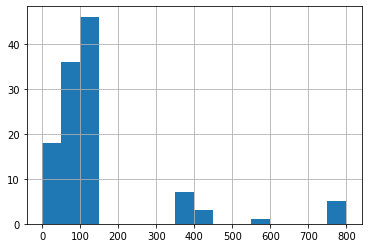

In [570]:
df.GPUUtilization.hist(bins=16)

In [583]:
a = df[df.GPUUtilization < 70].loc[:,['trial_id', 'CPUUtilization', 'MemoryUtilization', 
                                  'GPUUtilization', 'GPUMemoryUtilization','config_st_instance_type',
                                  'st_worker_time']].st_worker_time.to_numpy()

In [584]:
b = df[df.GPUUtilization > 70].loc[:,['trial_id', 'CPUUtilization', 'MemoryUtilization', 
                                  'GPUUtilization', 'GPUMemoryUtilization','config_st_instance_type',
                                  'st_worker_time']].st_worker_time.to_numpy()

In [599]:
a.sort()
a

array([40.76888281, 41.42077739, 41.53312879, 41.7337218 , 41.81035827,
       42.78733454, 43.67972871, 44.81968807, 45.51931776, 45.58893937,
       47.88011067, 48.29767563, 53.47066596, 54.73595864, 64.15503751,
       87.34894276, 91.43855425, 94.95200293])

In [598]:
b.sort()
b

array([ 64.44498   ,  82.18276891,  82.43170875,  83.31526658,
        86.03423448,  87.23189225,  91.04585056,  91.30811491,
        91.69078871,  91.83839752,  92.00435088,  92.1221022 ,
        92.4254874 ,  92.53069789,  92.64814081,  92.8368899 ,
        92.92366117,  93.06249657,  93.10450427,  93.20035234,
        93.43861302,  93.52470566,  93.61499748,  93.98673689,
        94.12081079,  94.16980987,  94.59798512,  94.64475739,
        95.24808202,  95.83205309,  96.35340302,  96.4810969 ,
        97.37905731,  97.54687134,  98.33504292,  98.99654743,
        99.63687718,  99.88222519, 100.1231783 , 100.70916199,
       100.9624519 , 101.45679979, 102.92579688, 103.45366299,
       105.55624114, 105.57700056, 105.75113804, 105.94101486,
       106.78369998, 107.96963759, 111.74843675, 115.09475559,
       118.6927087 , 124.485938  , 124.61246849, 125.03229853,
       125.26535232, 126.50487445, 132.0347174 , 138.91441615,
       250.58805029, 252.14770813, 252.76290214, 257.21

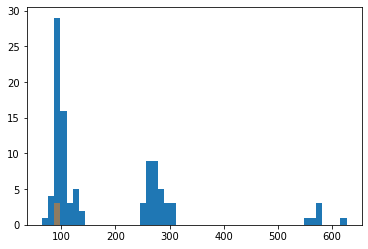

In [594]:
import matplotlib.pyplot as plt

_, bins, _ = plt.hist(b, bins=50)
_ = plt.hist(a, bins=bins, alpha=0.5)

(array([53.,  7.,  0., 26.,  6.,  0.,  0.,  0.,  2.,  4.]),
 array([ 64.44498   , 120.74380768, 177.04263535, 233.34146302,
        289.6402907 , 345.93911837, 402.23794605, 458.53677372,
        514.83560139, 571.13442907, 627.43325674]),
 <BarContainer object of 10 artists>)

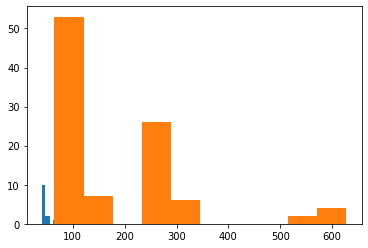

In [587]:
plt.hist(a)
plt.hist(b)

# Find training throughput via just stopping a run at 15min

In [8]:
import sys
import importlib

sys.path.append('/Users/awgol/code/syne-tune')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

from syne_tune.util import experiment_path, s3_experiment_path
importlib.reload(syne_tune.util)

import adam_scripts.utils
importlib.reload(adam_scripts.utils)

from syne_tune.backend.sagemaker_backend.instance_info import InstanceInfos
importlib.reload(syne_tune.backend.sagemaker_backend.instance_info)
instance_info = InstanceInfos()

import numpy as np
import pandas as pd
import boto3

import matplotlib.pyplot as plt
import pandas as pd

In [163]:
tuner_job_names = (
    'speed-bs-it-nw-new-2022-02-21-18-05-01-921',      # big sweep
    'speed-bs-it-nw-new-2022-02-28-13-37-54-540',    # ml.g5.xlarge, bs=48, num_data_workers>1
    'speed-bs-it-nw-new-2022-02-28-14-43-39-336',    # ml.g5.12xlarge, bs=48 num_data_workers>1
    'speed-bs-it-nw-g5xlarge-bs52-2022-03-11-14-41-19-715', # ml.g5.xlarge, bs=52, num_data_workers=0,1,2
    'speed-bs-it-nw-p3-16-2022-03-10-22-49-26-353',    # ml.p3.16xlarge
    'speed-bs-it-nw-g5-48-2022-03-11-10-05-28-531',    # ml.g5.48xlarge
    'speed-bs-it-nw-p3dn-24-2022-03-11-09-52-19-358',  # ml.p3dn.24xlarge
    'speed-bs-it-nw-p4d-24-2022-03-11-12-54-38-398',   # ml.p4d.24xlarge
    'speed-bs-it-nw-g5Xxlarge-bs52-2022-03-11-15-02-39-559', # ml.g5.*xlarge, bs=52
)

In [164]:
force_download = False

dfs_to_concat = list()
trial_id_max = -1
for tuner_job_name in tuner_job_names:
    df_temp = syne_tune.experiments.load_experiment(tuner_job_name, force_download=force_download).results
    df_temp['trial_id'] += trial_id_max + 1
    trial_id_max = df_temp['trial_id'].max()
    dfs_to_concat.append(df_temp)
df = pd.concat(dfs_to_concat).reset_index()

In [165]:
# Drop duplicates
temp = df.groupby(['trial_id', 'step']).loss.count().reset_index()
trial_ids_to_be_deleted = temp[temp.loss>1].trial_id.unique() 
trial_ids_to_be_deleted

array([  2, 967, 968])

In [166]:
df.drop(df.index[df['trial_id'].isin(trial_ids_to_be_deleted)], inplace=True)

In [167]:
# Total cost in USD
df.groupby('trial_id').st_worker_cost.max().sum()

303.0896059511142

In [168]:
# Compute time per samples
dfg = df.groupby(['trial_id'])

number_of_samples_processed = \
  (dfg.step.max() - dfg.step.min()) * \
  dfg.config_per_device_train_batch_size.max() * \
  dfg.config_st_instance_type.max().map(lambda x: instance_info(x).num_gpu)

samples_processed_per_second = number_of_samples_processed / \
  (dfg.st_worker_time.max() - dfg.st_worker_time.min())

# The variance of the timing results

In [286]:
import seaborn as sns

In [169]:
b = pd.concat([
    samples_processed_per_second, 
    dfg.config_st_instance_type.max(), 
    dfg.config_per_device_train_batch_size.max(),
    dfg.config_dataloader_num_workers.max(),
], axis=1)
b.columns = ['samples_processed_per_second'] + list(b.columns)[1:]

In [170]:
c = b.groupby(list(b.columns)[1:]).agg({'samples_processed_per_second': ['mean', 'std', 'count']})

In [ ]:
pd.set_option('display.max_rows', c.shape[0]+1)

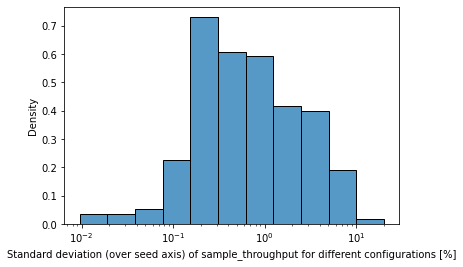

In [300]:
# Some outlier, but mostly the variance in the timing results is small
fig=plt.figure(facecolor='white')
d = (c[('samples_processed_per_second',  'std')]/c[('samples_processed_per_second',  'mean')])
# np.log(100.*d).hist(density=True)
sns.histplot(100.*d, log_scale=True, stat="density")
# plt.xscale('log', base=2)
_ = plt.xlabel('Standard deviation (over seed axis) of sample_throughput for different configurations [%]')
_ = plt.ylabel('Density')

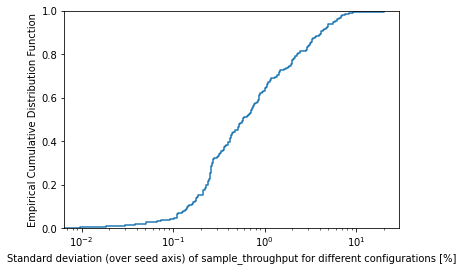

In [301]:
# Some outlier, but mostly the variance in the timing results is small
fig=plt.figure(facecolor='white')
d = (c[('samples_processed_per_second',  'std')]/c[('samples_processed_per_second',  'mean')])
# (100.*d).hist(density=True)
sns.ecdfplot(100.*d)
plt.xscale('log', base=10)
_ = plt.xlabel('Standard deviation (over seed axis) of sample_throughput for different configurations [%]')
_ = plt.ylabel('Empirical Cumulative Distribution Function')

# The effect of dataloader_num_workers

In [172]:
e = c.xs(key=(1,), level=('config_dataloader_num_workers',)).loc[:,('samples_processed_per_second', 'mean')] / \
      c.xs(key=(0,), level=('config_dataloader_num_workers',)).loc[:,('samples_processed_per_second', 'mean')]

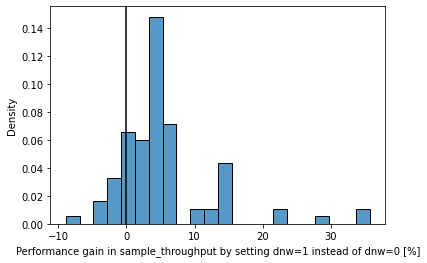

In [302]:
# Using dataloader_num_workers=1 rather than 0 improves performance on average
fig=plt.figure(facecolor='white')
# ((e-1.)*100.).hist(density=True)
sns.histplot(100.*(e-1.), stat="density")
_ = plt.xlabel('Performance gain in sample_throughput by setting dnw=1 instead of dnw=0 [%]')
_ = plt.ylabel('Density')
plt.axvline(x=0, color='k')

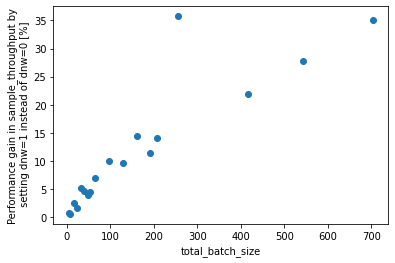

In [312]:
f = e.reset_index()
f.columns = ('config_st_instance_type', 'config_per_device_train_batch_size', 'samples_processed_per_second')

f['total_batch_size'] = \
  f.reset_index().config_per_device_train_batch_size * \
  f.reset_index().config_st_instance_type.map(lambda x: instance_info(x).num_gpu)

f = f.groupby('total_batch_size').samples_processed_per_second.mean()

fig=plt.figure(facecolor='white')
plt.scatter(f.index, (f-1.)*100.)
_ = plt.xlabel("total_batch_size")
_ = plt.ylabel('Performance gain in sample_throughput by\n setting dnw=1 instead of dnw=0 [%]')

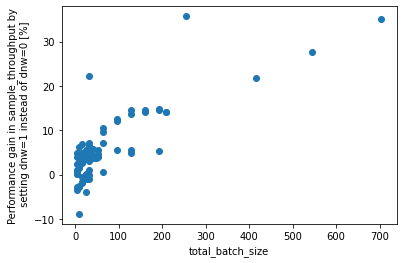

In [313]:
f = e.reset_index()
f.columns = ('config_st_instance_type', 'config_per_device_train_batch_size', 'samples_processed_per_second')

f['total_batch_size'] = \
  f.reset_index().config_per_device_train_batch_size * \
  f.reset_index().config_st_instance_type.map(lambda x: instance_info(x).num_gpu)

# f = f.groupby('total_batch_size').samples_processed_per_second.mean()

fig=plt.figure(facecolor='white')
plt.scatter(f.total_batch_size, (f.samples_processed_per_second-1.)*100.)
_ = plt.xlabel("total_batch_size")
_ = plt.ylabel('Performance gain in sample_throughput by\n setting dnw=1 instead of dnw=0 [%]')

# Investigate the performance of different instance-types and per-device-train-batch-sizes averaging the results

In [58]:
colormap_name = 'Set1'

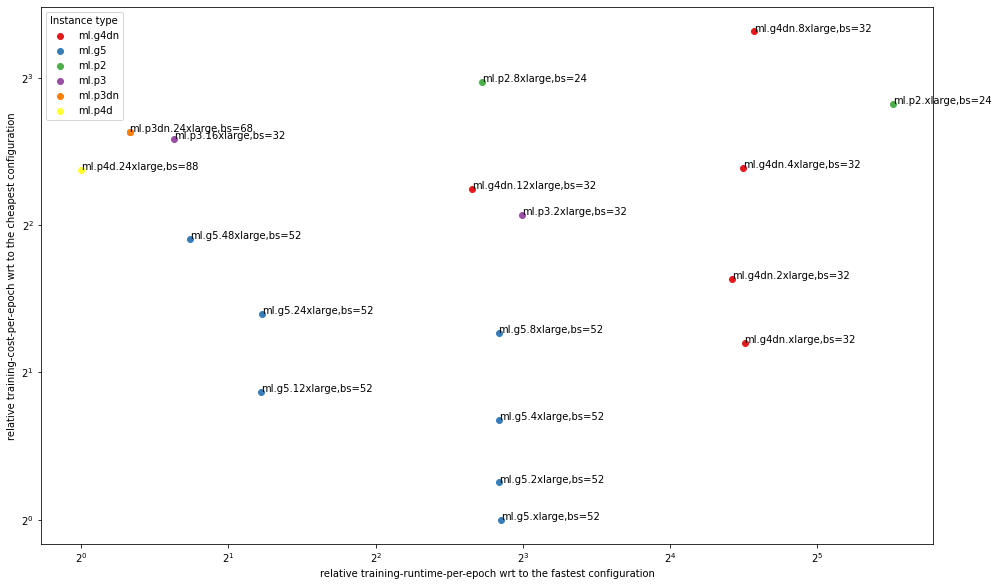

In [176]:
dfrt = c.xs(
    key=(0,), 
    level=('config_dataloader_num_workers',)).loc[:,('samples_processed_per_second', 'mean')].reset_index()
dfrt.columns = ('config_st_instance_type', 'config_per_device_train_batch_size', 'samples_processed_per_second')

idx = dfrt.groupby('config_st_instance_type').config_per_device_train_batch_size.idxmax()
dfrt = dfrt.iloc[idx]

dfrt['time_per_sample'] = 1. / dfrt['samples_processed_per_second']
dfrt['cost_per_sample'] = dfrt['time_per_sample'] * \
  dfrt.config_st_instance_type.map(lambda x: instance_info(x).cost_per_hour)

dfrt['time_per_sample'] /= dfrt['time_per_sample'].min()
dfrt['cost_per_sample'] /= dfrt['cost_per_sample'].min()



# plot itself
fig, ax = plt.subplots(figsize=(16,16))

instance_types = list(set(x.split('.')[1] for x in dfrt.config_st_instance_type.unique()))
instance_types.sort()

cmap_colors = plt.get_cmap(colormap_name).colors

for i, instance_type in enumerate(instance_types):
    dfrtt = dfrt[dfrt.config_st_instance_type.str.startswith(f'ml.{instance_type}')]
    ax.scatter(dfrtt.time_per_sample, dfrtt.cost_per_sample, color=cmap_colors[i], label=f'ml.{instance_type}')

ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

for i, row in dfrt.iterrows():
    ax.annotate(f"{row.config_st_instance_type},bs={row.config_per_device_train_batch_size}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)


# dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
# ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

# ax.set_ylim([0.9, 32.])
# ax.set_xlim([0.9, 32.])
ax.set_aspect('equal')
plt.legend(title='Instance type')

fig.patch.set_facecolor('white')

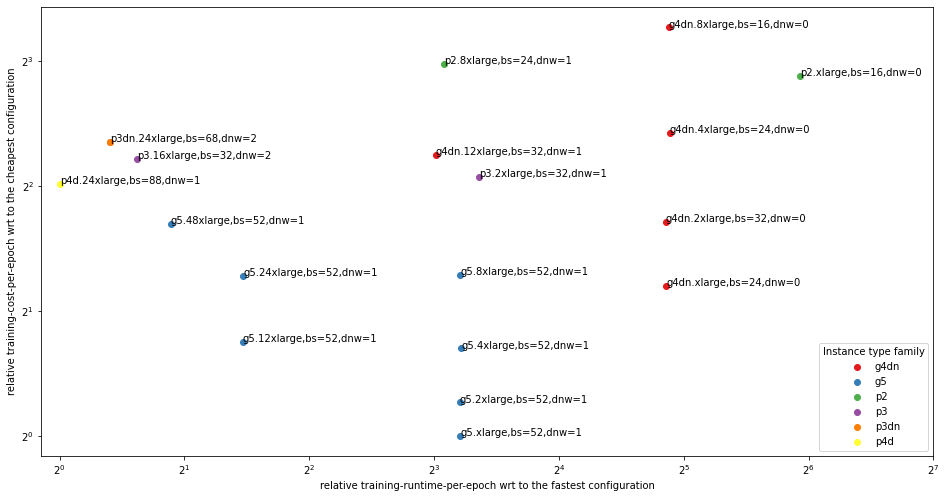

In [177]:
dfrt = c.loc[:,('samples_processed_per_second', 'mean')].reset_index()
dfrt.columns = ('config_st_instance_type', 'config_per_device_train_batch_size', 
                'config_dataloader_num_workers', 'samples_processed_per_second')

idx = dfrt.groupby('config_st_instance_type').samples_processed_per_second.idxmax()
dfrt = dfrt.iloc[idx]

dfrt['time_per_sample'] = 1. / dfrt['samples_processed_per_second']
dfrt['cost_per_sample'] = dfrt['time_per_sample'] * \
  dfrt.config_st_instance_type.map(lambda x: instance_info(x).cost_per_hour)

dfrt['time_per_sample'] /= dfrt['time_per_sample'].min()
dfrt['cost_per_sample'] /= dfrt['cost_per_sample'].min()



# plot itself
fig, ax = plt.subplots(figsize=(16,16))

instance_types = list(set(x.split('.')[1] for x in dfrt.config_st_instance_type.unique()))
instance_types.sort()

cmap_colors = plt.get_cmap(colormap_name).colors

for i, instance_type in enumerate(instance_types):
    dfrtt = dfrt[dfrt.config_st_instance_type.str.startswith(f'ml.{instance_type}')]
    ax.scatter(dfrtt.time_per_sample, dfrtt.cost_per_sample, color=cmap_colors[i], label=instance_type)

ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

for i, row in dfrt.iterrows():
    ax.annotate(f"{row.config_st_instance_type[3:]},"
                f"bs={row.config_per_device_train_batch_size},"
                f"dnw={row.config_dataloader_num_workers}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)


# dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
# ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

# ax.set_ylim([0.9, 16.])
ax.set_xlim([0.9, 128.])
ax.set_aspect('equal')
plt.legend(title='Instance type family', loc=4)

fig.patch.set_facecolor('white')

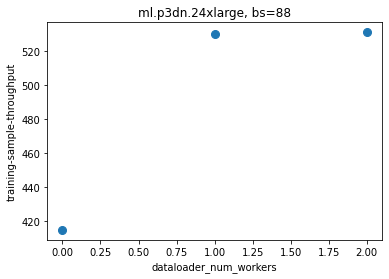

In [318]:
fig, ax = plt.subplots(figsize=(6,4))
c.xs(key=('ml.p3dn.24xlarge',), level=('config_st_instance_type',)).reset_index().plot.scatter(
    x='config_dataloader_num_workers', y=('samples_processed_per_second',  'mean'), legend=None, ax=ax, 
    s=64)
plt.title('ml.p3dn.24xlarge, bs=88')
plt.xlabel('dataloader_num_workers')
plt.ylabel('training-sample-throughput')
plt.legend('', frameon=False)
fig.patch.set_facecolor('white')

In [332]:
c

samples_processed_per_second  \
                                                                                                                 mean   
config_st_instance_type config_per_device_train_batch_size config_dataloader_num_workers                                
ml.g4dn.12xlarge        4                                  0                                                53.412797   
                                                           1                                                53.087075   
                        8                                  0                                                65.676184   
                                                           1                                                66.337359   
                        16                                 0                                                73.363104   
                                                           1                                                78.604124   
                        24                                 0                                                80.370548   
                                                           1                                                84.794868   
                        32                                 0                                                82.690760   
                                                           1                                                87.225556   
ml.g4dn.2xlarge         4                                  0                                                21.067060   
                                                           1                                                20.334870   
                        8                                  0                                                22.801884   
                                                           1                                                22.142732   
                        16                                 0                                                23.074074   
                                                           1                                                23.887083   
                        24                                 0                                                23.952176   
                                                           1                                                23.995345   
                        32                                 0                                                24.321293   
                                                           1                                                24.101487   
ml.g4dn.4xlarge         4                                  0                                                20.386529   
                                                           1                                                20.604529   
                        8                                  0                                                21.551443   
                                                           1                                                21.865534   
                        16                                 0                                                22.712567   
                                                           1                                                23.321591   
                        24                                 0                                                23.796120   
                                                           1                                                23.567018   
                        32                                 0                                                23.115706   
                                                           1                                                23.101966   
ml.g4dn.8xlarge         4                                  0                                    

In [334]:
c.index[0]

('ml.g4dn.12xlarge', 4, 0)

In [336]:
c.loc[('ml.g4dn.xlarge', 8, 1)]

samples_processed_per_second  mean     20.651539
                              std       1.019231
                              count     3.000000
Name: (ml.g4dn.xlarge, 8, 1), dtype: float64

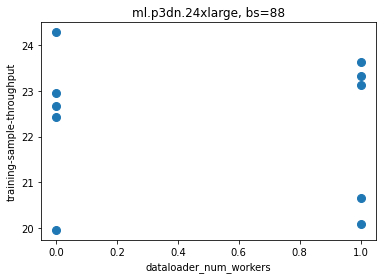

In [327]:
fig, ax = plt.subplots(figsize=(6,4))
c.xs(key=('ml.g4dn.xlarge',), level=('config_st_instance_type',)).reset_index().plot.scatter(
    x='config_dataloader_num_workers', y=('samples_processed_per_second',  'mean'), legend=None, ax=ax, 
    s=64)
# plt.title('ml.p3dn.24xlarge, bs=88')
plt.xlabel('dataloader_num_workers')
plt.ylabel('training-sample-throughput')
plt.legend('', frameon=False)
fig.patch.set_facecolor('white')

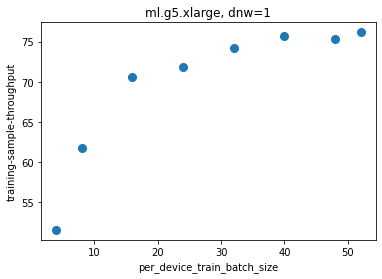

In [322]:
instance_type = 'ml.g5.xlarge'

fig, ax = plt.subplots(figsize=(6,4))
(c.xs(key=(instance_type, 1), level=('config_st_instance_type','config_dataloader_num_workers')).
 reset_index().plot.scatter(
    x='config_per_device_train_batch_size', y=('samples_processed_per_second',  'mean'), legend=None, ax=ax, s=64))
plt.title(f'{instance_type}, dnw=1')
plt.xlabel('per_device_train_batch_size')
plt.ylabel('training-sample-throughput')
plt.legend('', frameon=False)
fig.patch.set_facecolor('white')

# dataloader_num_workers for ml.g5

In [182]:
c.xs(key=('ml.g5.xlarge',), level=('config_st_instance_type',))

samples_processed_per_second  \
                                                                                         mean   
config_per_device_train_batch_size config_dataloader_num_workers                                
4                                  0                                                49.605837   
                                   1                                                51.524102   
8                                  0                                                59.404791   
                                   1                                                61.731218   
16                                 0                                                67.995649   
                                   1                                                70.614819   
24                                 0                                                69.104639   
                                   1                                                71.827345   
32                                 0                                                70.943301   
                                   1                                                74.182810   
40                                 0                                                71.537454   
                                   1                                                75.647345   
48                                 0                                                72.203017   
                                   1                                                75.304090   
                                   2                                                75.302760   
                                   3                                                75.707377   
                                   4                                                75.187312   
                                   5                                                75.085133   
                                   6                                                75.465515   
52                                 0                                                72.165464   
                                   1                                                76.165427   

                                                                            \
                                                                       std   
config_per_device_train_batch_size config_dataloader_num_workers             
4                                  0                              1.606038   
                                   1                              0.222261   
8                                  0                              1.183829   
                                   1                              0.553171   
16                                 0                              0.145544   
                                   1                              0.219419   
24                                 0                              0.006599   
                                   1                              0.418388   
32                                 0                              0.114691   
                                   1                              0.260769   
40                                 0                              1.024768   
                                   1                              0.198454   
48                                 0                              0.182789   
                                   1                              0.076712   
                                   2                              0.123883   
                                   3                              0.198686   
                                   4                              0.392545   
                                   5                              0.125499   
                                   6                              0.084422   
52                  

In [280]:
c.xs(key=('ml.g5.12xlarge', 48), level=('config_st_instance_type', 'config_per_device_train_batch_size'))

samples_processed_per_second                
                                                      mean       std count
config_dataloader_num_workers                                             
0                                               214.631549  0.311886     3
1                                               245.699000  0.638360     3
2                                               245.062130  0.124582     3
3                                               244.980097  0.179351     3
4                                               245.342566  0.604251     3

# Find maximum batch size for instance-type

In [283]:
import sys
import importlib

sys.path.append('/Users/awgol/code/syne-tune')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

from syne_tune.util import experiment_path, s3_experiment_path
importlib.reload(syne_tune.util)

import adam_scripts.utils
importlib.reload(adam_scripts.utils)

import numpy as np
import pandas as pd
import boto3

boto3_client_sagemaker = boto3.client('sagemaker')
boto3_resource_cloudwatch = boto3.resource('cloudwatch')

# (metric name, 1-min-window aggregation statistic ['Average', 'Maximum'], entire-training aggregation function)
fields_to_extract = [
    ('CPUUtilization', 'Average', np.max),
    ('MemoryUtilization', 'Average', np.max),
    ('GPUUtilization', 'Average', np.max),
    ('GPUMemoryUtilization', 'Average', np.max),
]

In [284]:
tuner_job_name = 'speed-bs-it-nw-new-2022-02-21-18-05-01-921'

In [285]:
# df1 = blackbox_repository.adam_utils.download_cloudwatch_metrics_and_save_to_csv(
#     'speed-bs-it-nw-new-2022-02-22-18-19-24-662', fields_to_extract, boto3_client_sagemaker, boto3_resource_cloudwatch)

In [286]:
# df = pd.merge(
#     left=pd.read_csv(s3_experiment_path(tuner_name=tuner_job_name) + '/cloudwatch_metrics.csv'), 
#     right=syne_tune.experiments.load_experiment(tuner_job_name).results, 
#     on='trial_id')

In [287]:
# df = pd.read_csv('s3://sagemaker-us-west-2-640549960621/syne-tune/speed-bs-it-nw-new-2022-02-21-18-05-01-921/cloudwatch_metrics.csv')

In [288]:
left = pd.read_csv('/Users/awgol/Downloads/cloudwatch_metrics-speed-bs-it-nw-new-2022-02-21-18-05-01-921.csv')
right = syne_tune.experiments.load_experiment(tuner_job_name).results

In [289]:
# All of the runs now have CloudWatch statistics associated with them
len(left.trial_id.unique()),len(right.trial_id.unique())

(461, 461)

In [290]:
df = pd.merge(
    left=pd.read_csv('/Users/awgol/Downloads/cloudwatch_metrics-speed-bs-it-nw-new-2022-02-21-18-05-01-921.csv'), 
    right=syne_tune.experiments.load_experiment(tuner_job_name).results, 
    on='trial_id')

In [291]:
memory_per_four = \
  df[df['config_per_device_train_batch_size']==8].groupby('config_st_instance_type').GPUMemoryUtilization.mean() -\
  df[df['config_per_device_train_batch_size']==4].groupby('config_st_instance_type').GPUMemoryUtilization.mean()
num_gpus_per_instance = pd.Series([instance_info(i).num_gpu for i in memory_per_four.index], 
                                  index=memory_per_four.index, name='num_gpus_per_instance')
memory_per_four /= num_gpus_per_instance

In [292]:
space_left = \
  (100. - \
   df[df['config_per_device_train_batch_size']==8].groupby('config_st_instance_type').GPUMemoryUtilization.mean() /\
   num_gpus_per_instance)

In [306]:
threshold = 0

(8+np.floor((space_left-threshold)/memory_per_four)*4) - \
  df.groupby('config_st_instance_type').config_per_device_train_batch_size.max()

config_st_instance_type
ml.g4dn.12xlarge    0.0
ml.g4dn.2xlarge     0.0
ml.g4dn.4xlarge     0.0
ml.g4dn.8xlarge     0.0
ml.g4dn.xlarge      0.0
ml.g5.12xlarge      4.0
ml.g5.24xlarge      4.0
ml.g5.2xlarge       0.0
ml.g5.4xlarge       0.0
ml.g5.8xlarge       0.0
ml.g5.xlarge        0.0
ml.p2.8xlarge       0.0
ml.p2.xlarge        0.0
ml.p3.2xlarge       0.0
dtype: float64

In [307]:
# We could still fit a larger batch size on ml.g5 apparently
# As predicted [config_per_device_train_batch_size=52, config_st_instance_type=ml.g5.*] ran successfully

In [305]:
# df.groupby('config_st_instance_type').config_per_device_train_batch_size.max()

# Determining the batch_size for all instance_types using only one instance_type

In [282]:
# run everything in the section above

In [296]:
gpu_memory_per_instace_type = {
    'g4dn': 16,
    'g5': 24,
    'p2': 12,
    'p3': 16,
    'p3dn': 32,
    'p4d': 40,
}

In [299]:
instance_type = 'ml.g5.xlarge'

In [308]:
memory_abs_per_four = memory_per_four[instance_type] / 100. * gpu_memory_per_instace_type[instance_type.split('.')[1]]

In [310]:
{k: np.floor(v/memory_abs_per_four)*4 for k, v in gpu_memory_per_instace_type.items()}

{'g4dn': 32.0, 'g5': 52.0, 'p2': 24.0, 'p3': 32.0, 'p3dn': 68.0, 'p4d': 88.0}

# DeepAR Pareto fronts

In [224]:
from sagemaker import TrainingJobAnalytics
import syne_tune.experiments
import boto3
import pandas as pd
import tqdm
import matplotlib

In [225]:
sagemaker_boto3 = boto3.client('sagemaker')

In [226]:
data = []

tuner_name = 'deepar-small-2022-03-04-02-44-15-320'

for trial_id in tqdm.trange(14):
    job_name = f'{tuner_name}-{trial_id}'
    df = TrainingJobAnalytics(training_job_name=job_name).dataframe()
    job_details = sagemaker_boto3.describe_training_job(TrainingJobName=job_name)
    
    avg_throughput = df[df.metric_name=='train:throughput'].value.mean()
    instance_type = job_details['ResourceConfig']['InstanceType']
    
    data.append(['small', job_name, trial_id, avg_throughput, instance_type])
    
tuner_name = 'deepar-large-2022-03-04-03-03-34-852'

for trial_id in tqdm.trange(14):
    job_name = f'{tuner_name}-{trial_id}'
    df = TrainingJobAnalytics(training_job_name=job_name).dataframe()
    job_details = sagemaker_boto3.describe_training_job(TrainingJobName=job_name)
    
    avg_throughput = df[df.metric_name=='train:throughput'].value.mean()
    instance_type = job_details['ResourceConfig']['InstanceType']
    
    data.append(['large', job_name, trial_id, avg_throughput, instance_type])

df = pd.DataFrame(data, columns=['type', 'job_name', 'trial_id', 'avg_throughput', 'config_st_instance_type'])

  0%|                                                                                                  | 0/14 [00:08<?, ?it/s]


AttributeError: 'DataFrame' object has no attribute 'metric_name'

In [205]:
path = '~/Downloads/df-deepar-small-2022-03-04-02-44-15-320-deepar-large-2022-03-04-03-03-34-852.csv.zip'
# df.to_csv(path)
df = pd.read_csv(path)

In [201]:
df['time_per_sample'] = 1. / df['avg_throughput']
df['cost_per_sample'] = df['time_per_sample'] * \
  df.config_st_instance_type.map(lambda x: instance_info(x).cost_per_hour)

dfs = df[df.type=='small']
dfl = df[df.type=='large']

dfs['time_per_sample'] /= dfs['time_per_sample'].min()
dfs['cost_per_sample'] /= dfs['cost_per_sample'].min()
dfl['time_per_sample'] /= dfl['time_per_sample'].min()
dfl['cost_per_sample'] /= dfl['cost_per_sample'].min()

/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [202]:
# fig, ax = plt.subplots(figsize=(16,16))

# cmap_colors = plt.get_cmap(colormap_name).colors

# markers = ("v", "^", "<", ">", "1", "2", "3")

# instance_types = list(set(x.split('.')[1] for x in df.config_st_instance_type.unique()))
# instance_types.sort()

# colors_dict = {v: cmap_colors[i] for i, v in enumerate(instance_types)}
# markers_dict = {v: markers[i] for i, v in enumerate(instance_types)}


# for i, instance_type in enumerate(instance_types):
#     dfrtt = dfrt[dfrt.config_st_instance_type.str.startswith(f'ml.{instance_type}')]
    
#     ax.scatter(dfl.time_per_sample, dfl.cost_per_sample, color='r', label='large DeepAR (num_cells=100, num_layers=4)')

# for i, row in dfs.iterrows():
#     ax.scatter(row.time_per_sample, row.cost_per_sample, 
#                color='b', 
#                marker=markers_dict[,
#                label='small DeepAR (num_cells=30, num_layers=1)')
#     ax.annotate(f"{row.config_st_instance_type}", 
#                 (row.time_per_sample, row.cost_per_sample), rotation=0)
# # for i, row in dfl.iterrows():
# #     ax.scatter(dfl.time_per_sample, dfl.cost_per_sample, 
# #                color='r', label='large DeepAR (num_cells=100, num_layers=4)')
# #     ax.annotate(f"{row.config_st_instance_type}", 
# #                 (row.time_per_sample, row.cost_per_sample), rotation=0)


# ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
# ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

# ax.set_yscale('log', base=2)
# ax.set_xscale('log', base=2)

# # ax.set_ylim([0., 12.])
# # ax.set_xlim([0., 12.])
# ax.set_aspect('equal')

# fig.patch.set_facecolor('white')

# plt.legend()

In [15]:
def plot_pareto_front_given_points(xs, ys, ax, **kwargs):
    assert len(xs) == len(ys)
    n = len(xs)
    xs = list(xs)
    ys = list(ys)
    # make sure they're sorted    
    xs.insert(0, 100.)
    ys.insert(0, 100.)
    xs.append(100.)
    ys.append(100.)
    for i in range(1, n+1):
        ax.add_line(matplotlib.lines.Line2D([xs[i], xs[i+1]], [ys[i], ys[i]], **kwargs))
        ax.add_line(matplotlib.lines.Line2D([xs[i], xs[i]], [ys[i-1], ys[i]], **kwargs))

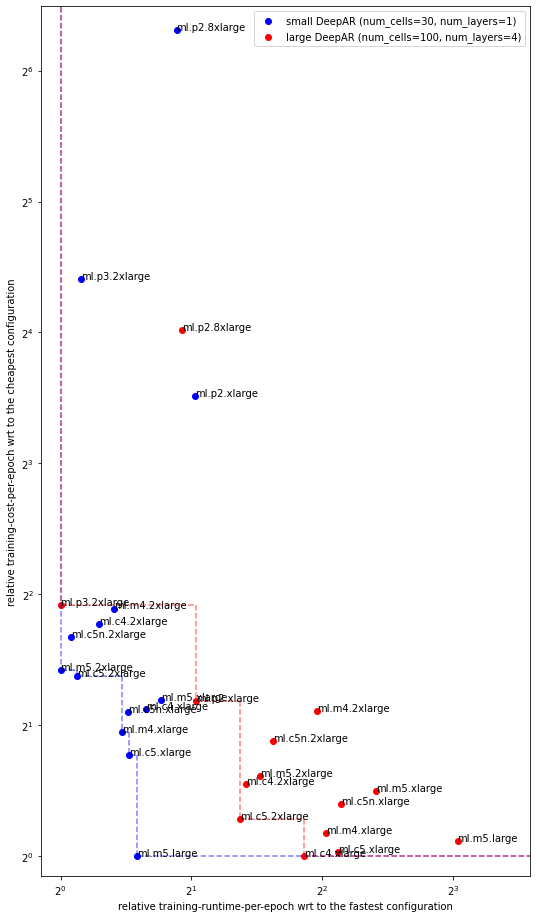

In [280]:
fig, ax = plt.subplots(figsize=(16,16))

cmap_colors = plt.get_cmap(colormap_name).colors

instance_types = list(set(x.split('.')[1] for x in dfrt.config_st_instance_type.unique()))
instance_types.sort()
colors_dict = {v: cmap_colors[i] for i, v in enumerate(instance_types)}

ax.scatter(dfs.time_per_sample, dfs.cost_per_sample, color='b',
               label='small DeepAR (num_cells=30, num_layers=1)')
ax.scatter(dfl.time_per_sample, dfl.cost_per_sample, color='r', 
           label='large DeepAR (num_cells=100, num_layers=4)')

for i, row in dfs.iterrows():
    ax.annotate(f"{row.config_st_instance_type}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)
for i, row in dfl.iterrows():
    ax.annotate(f"{row.config_st_instance_type}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)


temp = (dfs[
    is_pareto_efficient(dfs.loc[:,['time_per_sample', 'cost_per_sample']].to_numpy())]
        .loc[:,['time_per_sample', 'cost_per_sample']]
        .to_numpy())
temp = temp[temp[:, 0].argsort()]
xs = temp[:, 0].tolist()
ys = temp[:, 1].tolist()
plot_pareto_front_given_points(xs=xs, ys=ys, ax=ax, 
                               color='b', linestyle='--', alpha=0.5)

temp = (dfl[
    is_pareto_efficient(dfl.loc[:,['time_per_sample', 'cost_per_sample']].to_numpy())]
        .loc[:,['time_per_sample', 'cost_per_sample']]
        .to_numpy())
temp = temp[temp[:, 0].argsort()]
xs = temp[:, 0].tolist()
ys = temp[:, 1].tolist()
plot_pareto_front_given_points(xs=xs, ys=ys, ax=ax, 
                               color='r', linestyle='--', alpha=0.5)


ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

ax.set_ylim([0.9, 90.])
ax.set_xlim([0.9, 12.])
ax.set_aspect('equal')

fig.patch.set_facecolor('white')

_ = ax.legend()



# Some jobs have multiple traces under one trial-id

In [262]:
df = syne_tune.experiments.load_experiment(tuner_job_names[1], force_download=True).results

In [263]:
df.columns

Index(['step', 'loss', 'st_worker_timestamp', 'st_worker_time', 'st_worker_cost', 'st_worker_iter', 'st_decision', 'st_status', 'trial_id', 'config_dataloader_num_workers', 'config_epochs', 'config_eval_interval', 'config_learning_rate', 'config_log_interval', 'config_max_resource_level', 'config_n_eval_data', 'config_n_train_data', 'config_per_device_eval_batch_size', 'config_per_device_train_batch_size', 'config_st_checkpoint_dir', 'config_st_instance_count', 'config_st_instance_type', 'config_weight_decay', 'st_tuner_time'], dtype='object')

In [264]:
a = df.groupby(['trial_id', 'step']).agg(
    {'st_worker_timestamp':pd.Series.tolist}).reset_index()

In [265]:
(a.st_worker_timestamp.apply(len)>1).sum()

41

In [266]:
a[(a.st_worker_timestamp.apply(len)>1)].trial_id.unique()

array([2, 6, 8])

<AxesSubplot:xlabel='st_worker_timestamp'>

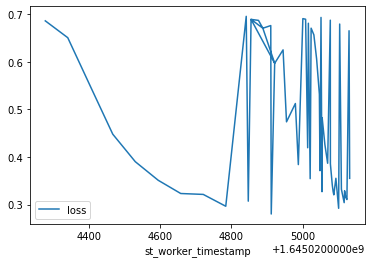

In [250]:
df[(df.trial_id==6)].plot(x='st_worker_timestamp',y='loss')

In [272]:
df.columns

Index(['step', 'loss', 'st_worker_timestamp', 'st_worker_time', 'st_worker_cost', 'st_worker_iter', 'st_decision', 'st_status', 'trial_id', 'config_dataloader_num_workers', 'config_epochs', 'config_eval_interval', 'config_learning_rate', 'config_log_interval', 'config_max_resource_level', 'config_n_eval_data', 'config_n_train_data', 'config_per_device_eval_batch_size', 'config_per_device_train_batch_size', 'config_st_checkpoint_dir', 'config_st_instance_count', 'config_st_instance_type', 'config_weight_decay', 'st_tuner_time'], dtype='object')

In [273]:
b = df[(df.trial_id==6)]

for col in ['trial_id', 'config_dataloader_num_workers', 'config_epochs', 'config_eval_interval', 
            'config_learning_rate', 'config_log_interval', 'config_max_resource_level', 'config_n_eval_data', 
            'config_n_train_data', 'config_per_device_eval_batch_size', 'config_per_device_train_batch_size', 
            'config_st_checkpoint_dir', 'config_st_instance_count', 'config_st_instance_type', 
            'config_weight_decay']:
    if len(b[col].unique())>1:
        print(b[col].unique())

In [269]:
df[(df.trial_id==6) | (df.trial_id==2) | (df.trial_id==8)]

,step,loss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_dataloader_num_workers,config_epochs,config_eval_interval,config_learning_rate,config_log_interval,config_max_resource_level,config_n_eval_data,config_n_train_data,config_per_device_eval_batch_size,config_per_device_train_batch_size,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time
4,100,0.6945,1.645013e+09,48.578307,0.033033,0,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,826.312965
11,100,0.6936,1.645013e+09,39.076665,0.013156,0,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,826.313244
20,100,0.6936,1.645013e+09,39.076665,0.013156,0,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,867.747249
26,100,0.6937,1.645013e+09,35.890626,0.038134,0,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,867.752117
29,200,0.6838,1.645013e+09,72.005655,0.024242,1,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,867.752181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,400,0.4198,1.645014e+09,197.382353,0.446523,3,CONTINUE,InProgress,8,2,3,0,0.000001,100,15,1,25000,1,16,/opt/ml/checkpoints,1,ml.p3.2xlarge,0.000001,1842.544295
1212,300,0.4747,1.645014e+09,180.891560,0.285005,2,CONTINUE,InProgress,8,2,3,0,0.000001,100,15,1,25000,1,16,/opt/ml/checkpoints,1,ml.p3.2xlarge,0.000001,1842.544458
1214,500,0.5295,1.645014e+09,183.709077,0.086037,4,CONTINUE,InProgress,8,2,3,0,0.000001,100,15,1,25000,1,16,/opt/ml/checkpoints,1,ml.p3.2xlarge,0.000001,1842.544518
1227,600,0.4046,1.645014e+09,205.525620,0.057433,5,CONTINUE,InProgress,8,2,3,0,0.000001,100,15,1,25000,1,16,/opt/ml/checkpoints,1,ml.p3.2xlarge,0.000001,1842.544950


In [253]:
len(df.trial_id.unique())

61

In [182]:
df.groupby(['trial_id', 'step'])

In [180]:
pd.Series(df.groupby(['trial_id', 'step']))

0         ((0, 100), [step])
1         ((0, 200), [step])
2         ((0, 300), [step])
3         ((0, 400), [step])
4         ((0, 500), [step])
                ...         
1637    ((115, 100), [step])
1638    ((115, 200), [step])
1639    ((115, 300), [step])
1640    ((115, 400), [step])
1641    ((115, 500), [step])
Length: 1642, dtype: object

In [152]:
i = lambda x: x
a = df.groupby(['trial_id', 'step']).agg({
#     'config_st_instance_type': i, 
#     'step': pd.Series.to_list,
    'st_worker_time': pd.Series.to_list
})

In [153]:
df.columns

Index(['step', 'loss', 'st_worker_timestamp', 'st_worker_time',
       'st_worker_cost', 'st_worker_iter', 'st_decision', 'st_status',
       'trial_id', 'config_dataloader_num_workers', 'config_epochs',
       'config_eval_interval', 'config_learning_rate', 'config_log_interval',
       'config_max_resource_level', 'config_n_eval_data',
       'config_n_train_data', 'config_per_device_eval_batch_size',
       'config_per_device_train_batch_size', 'config_seed',
       'config_st_checkpoint_dir', 'config_st_instance_count',
       'config_st_instance_type', 'config_weight_decay', 'st_tuner_time'],
      dtype='object')

In [155]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [156]:
df[(df.trial_id==2) & (df.step==600)]

,step,loss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_dataloader_num_workers,config_epochs,config_eval_interval,config_learning_rate,config_log_interval,config_max_resource_level,config_n_eval_data,config_n_train_data,config_per_device_eval_batch_size,config_per_device_train_batch_size,config_seed,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time
39,600,0.5085,1.645024e+09,53.238209,0.036202,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,603.472745
278,600,0.3502,1.645025e+09,205.494726,0.069183,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,768.140894
333,600,0.3502,1.645025e+09,205.494726,0.069183,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,983.021472
396,600,0.5385,1.645025e+09,223.346031,0.045662,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,983.022865
509,600,0.3986,1.645025e+09,328.147347,0.517014,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,983.025846
543,600,0.3423,1.645025e+09,287.406131,0.305369,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,983.026865
644,600,0.5385,1.645025e+09,223.346031,0.045662,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,1156.319013
654,600,0.3986,1.645025e+09,328.147347,0.517014,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,1156.319244
656,600,0.3423,1.645025e+09,287.406131,0.305369,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,1156.319288
943,600,0.5385,1.645025e+09,223.346031,0.045662,5,CONTINUE,InProgress,2,2,3,0,0.000001,100,15,1,25000,1,32,0,/opt/ml/checkpoints,1,ml.g5.8xlarge,0.000001,1368.922128


In [141]:
a.iloc[100]

st_worker_time    [53.23820892499998, 205.494725799, 205.4947257...
Name: (2, 600), dtype: object

# Plotting learning curves for HF-Blackbox

In [177]:
import syne_tune.experiments
import seaborn as sns
import pickle
import subprocess
from pathlib import Path

In [178]:
s3_bucket = 'mnemosyne-team-bucket'
syne_tune_folder = 'AdamG/syne-tune-copy'

In [204]:
tuner_name = 'simulated-tabular-backend-2022-05-13-16-28-19-160'

In [190]:
local_path = str(Path(f"~/syne-tune/{tuner_name}").expanduser())
s3_path = f"s3://{s3_bucket}/{syne_tune_folder}/{tuner_name}"
command = ['aws', 's3', 'cp', '--recursive', local_path, s3_path, '--profile', 'mnemosyne']
print(' '.join(command))
print()
subprocess.run(command);

aws s3 cp --recursive /Users/awgol/syne-tune/simulated-tabular-backend-2022-05-13-16-28-19-160 s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-16-28-19-160 --profile mnemosyne

upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-16-28-19-160/metadata.json to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-16-28-19-160/metadata.json
upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-16-28-19-160/results.csv.zip to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-16-28-19-160/results.csv.zip
upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-16-28-19-160/tuner.dill to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-16-28-19-160/tuner.dill


In [205]:
# dfff = syne_tune.experiments.load_experiment(tuner_name).results
df = pd.read_csv(
    f's3://mnemosyne-team-bucket/AdamG/syne-tune-copy/'
    f'{tuner_name}/results.csv.zip')

In [206]:
df.columns

Index(['metric_training_loss', 'metric_train_runtime', 'metric_cost', 'step',
       'st_tuner_time', 'st_decision', 'st_status', 'trial_id',
       'config_per_device_train_batch_size', 'config_learning_rate',
       'config_weight_decay', 'config_st_instance_type'],
      dtype='object')

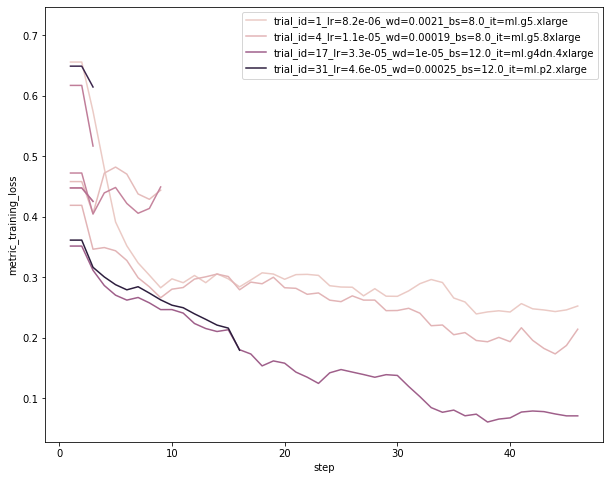

In [212]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="step", y="metric_training_loss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').step.max().nlargest(4).index.tolist()

labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_learning_rate:.2}_"
        f"wd={t.config_weight_decay:.2}_"
        f"bs={t.config_per_device_train_batch_size}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('hf-blackbox-1.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

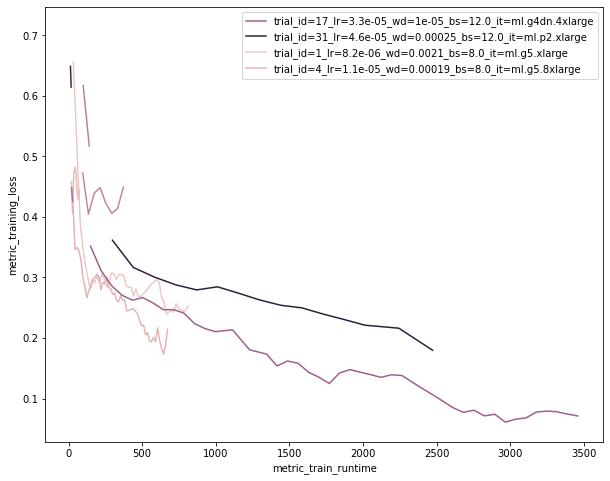

In [213]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="metric_train_runtime", y="metric_training_loss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').metric_train_runtime.max().nlargest(4).index.tolist()

labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_learning_rate:.2}_"
        f"wd={t.config_weight_decay:.2}_"
        f"bs={t.config_per_device_train_batch_size}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('hf-blackbox-2.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


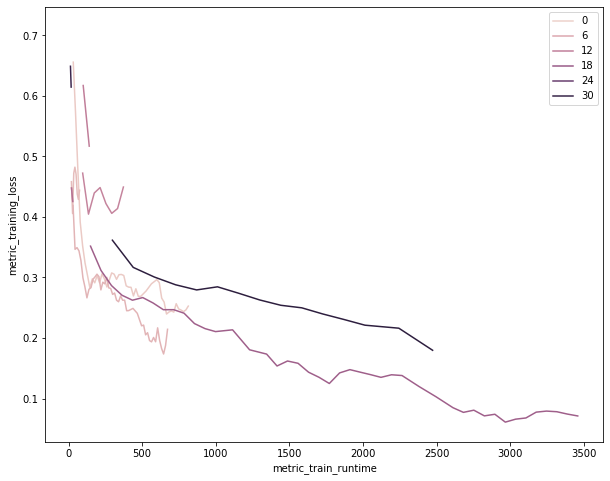

In [214]:
with open('hf-blackbox-2.pickle', 'rb') as handle:
    f = pickle.load(handle)

f.get_axes()[0].legend()
f.show()

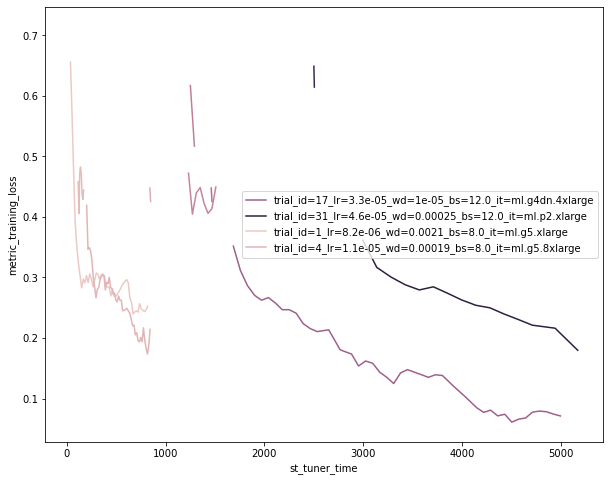

In [215]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="st_tuner_time", y="metric_training_loss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').metric_train_runtime.max().nlargest(4).index.tolist()

labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_learning_rate:.2}_"
        f"wd={t.config_weight_decay:.2}_"
        f"bs={t.config_per_device_train_batch_size}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('hf-blackbox-3.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Plotting learning curves for DeepAR-Blackbox

In [211]:
import matplotlib.pyplot as plt
import pandas as pd

In [217]:
tuner_name = 'simulated-tabular-backend-2022-05-13-14-45-03-128'

In [193]:
local_path = str(Path(f"~/syne-tune/{tuner_name}").expanduser())
s3_path = f"s3://{s3_bucket}/{syne_tune_folder}/{tuner_name}"
command = ['aws', 's3', 'cp', '--recursive', local_path, s3_path, '--profile', 'mnemosyne']
print(' '.join(command))
print()
subprocess.run(command);

aws s3 cp --recursive /Users/awgol/syne-tune/simulated-tabular-backend-2022-05-13-14-45-03-128 s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-14-45-03-128 --profile mnemosyne

upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-14-45-03-128/metadata.json to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-14-45-03-128/metadata.json
upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-14-45-03-128/results.csv.zip to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-14-45-03-128/results.csv.zip
upload: ../../../../syne-tune/simulated-tabular-backend-2022-05-13-14-45-03-128/tuner.dill to s3://mnemosyne-team-bucket/AdamG/syne-tune-copy/simulated-tabular-backend-2022-05-13-14-45-03-128/tuner.dill


In [218]:
# dfff = syne_tune.experiments.load_experiment(tuner_name).results
df = pd.read_csv(
    f's3://mnemosyne-team-bucket/AdamG/syne-tune-copy/'
    f'{tuner_name}/results.csv.zip')

In [219]:
df.columns

Index(['mean_wQuantileLoss', 'metric_train_runtime', 'metric_cost', 'step',
       'st_tuner_time', 'st_decision', 'st_status', 'trial_id', 'config_lr',
       'config_batch_size', 'config_num_cells', 'config_num_layers',
       'config_st_instance_type'],
      dtype='object')

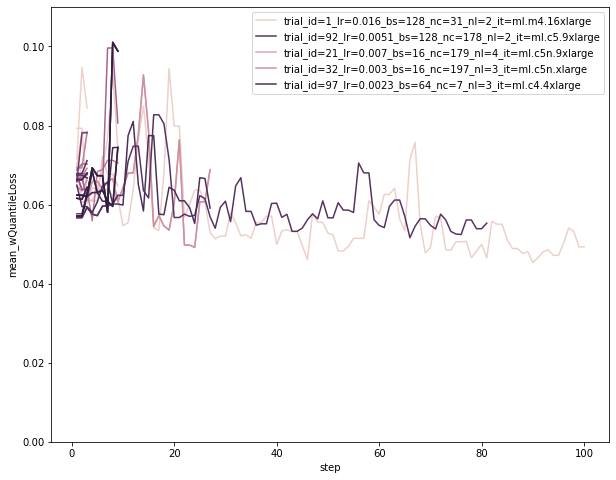

In [220]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="step", y="mean_wQuantileLoss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').step.max().nlargest(5).index.tolist()
ax.set_ylim(0, 0.11)
# ax.lines[-1].set_label('aa')
labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_lr:.2}_"
        f"bs={t.config_batch_size}_"
        f"nc={t.config_num_cells}_"
        f"nl={t.config_num_layers}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('deepar-blackbox-1.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

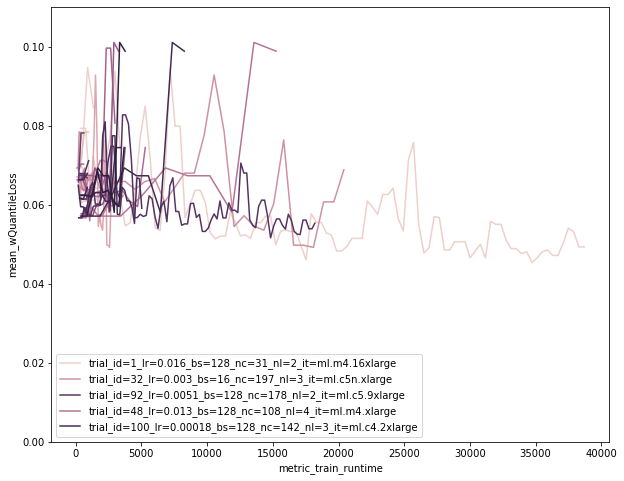

In [221]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="metric_train_runtime", y="mean_wQuantileLoss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').metric_train_runtime.max().nlargest(5).index.tolist()
ax.set_ylim(0, 0.11)
# ax.lines[-1].set_label('aa')
labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_lr:.2}_"
        f"bs={t.config_batch_size}_"
        f"nc={t.config_num_cells}_"
        f"nl={t.config_num_layers}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('deepar-blackbox-2.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

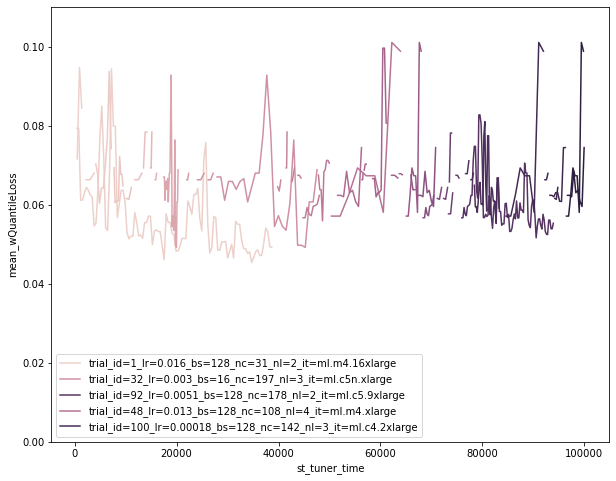

In [222]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.lineplot(data=df, hue="trial_id", x="st_tuner_time", y="mean_wQuantileLoss", ax=ax)
trial_ids_for_legend = df.groupby('trial_id').metric_train_runtime.max().nlargest(5).index.tolist()
ax.set_ylim(0, 0.11)
labels = []
for i in trial_ids_for_legend:
    t = df[df.trial_id == i].iloc[0]
    labels.append(
        f"trial_id={t.trial_id}_"
        f"lr={t.config_lr:.2}_"
        f"bs={t.config_batch_size}_"
        f"nc={t.config_num_cells}_"
        f"nl={t.config_num_layers}_"
        f"it={t.config_st_instance_type}"
    )

ax.legend([ax.lines[i] for i in trial_ids_for_legend], labels)

with open('deepar-blackbox-3.pickle', 'wb') as handle:
    pickle.dump(f, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Results of model based MOBO BOTorch baseline

In [223]:
dfff = syne_tune.experiments.load_experiment('simulated-tabular-backend-2022-03-31-09-07-40-551')

In [384]:
dfff.results

,training-runtime-per-sample,training-cost-per-sample,st_worker_time,st_worker_cost,step,st_tuner_time,st_decision,st_status,trial_id,config_config_st_instance_type,config_config_per_device_train_batch_size,config_config_dataloader_num_workers
0,0.004851,0.027513,310.344946,0.488966,1,310.446278,CONTINUE,Completed,0,ml.g5.12xlarge,52.0,0.0
1,1.000000,1.000000,360.000000,0.864000,1,675.102756,CONTINUE,Completed,1,ml.p2.8xlarge,64.0,0.0
2,1.000000,1.000000,360.000000,0.864000,1,1040.104715,CONTINUE,Completed,2,ml.p2.8xlarge,60.0,2.0
3,1.000000,1.000000,360.000000,0.304600,1,1405.106638,CONTINUE,Completed,3,ml.g4dn.8xlarge,36.0,1.0
4,1.000000,1.000000,360.000000,0.100600,1,1770.108556,CONTINUE,Completed,4,ml.g5.xlarge,64.0,2.0
5,0.009036,0.051254,513.894624,0.809670,1,2290.354220,CONTINUE,Completed,5,ml.g5.12xlarge,4.0,2.0
6,1.000000,1.000000,360.000000,0.567200,1,2652.471095,CONTINUE,Completed,6,ml.g5.12xlarge,88.0,0.0
7,1.000000,1.000000,360.000000,0.547700,1,3047.728805,CONTINUE,Completed,7,ml.g4dn.12xlarge,52.0,1.0
8,0.004524,0.025657,304.670906,0.480026,1,3358.582691,CONTINUE,Completed,8,ml.g5.12xlarge,32.0,1.0
9,0.004851,0.027513,310.344946,0.488966,1,3670.512511,CONTINUE,Completed,9,ml.g5.12xlarge,44.0,0.0


Text(0.5, 1.0, 'iter=42')

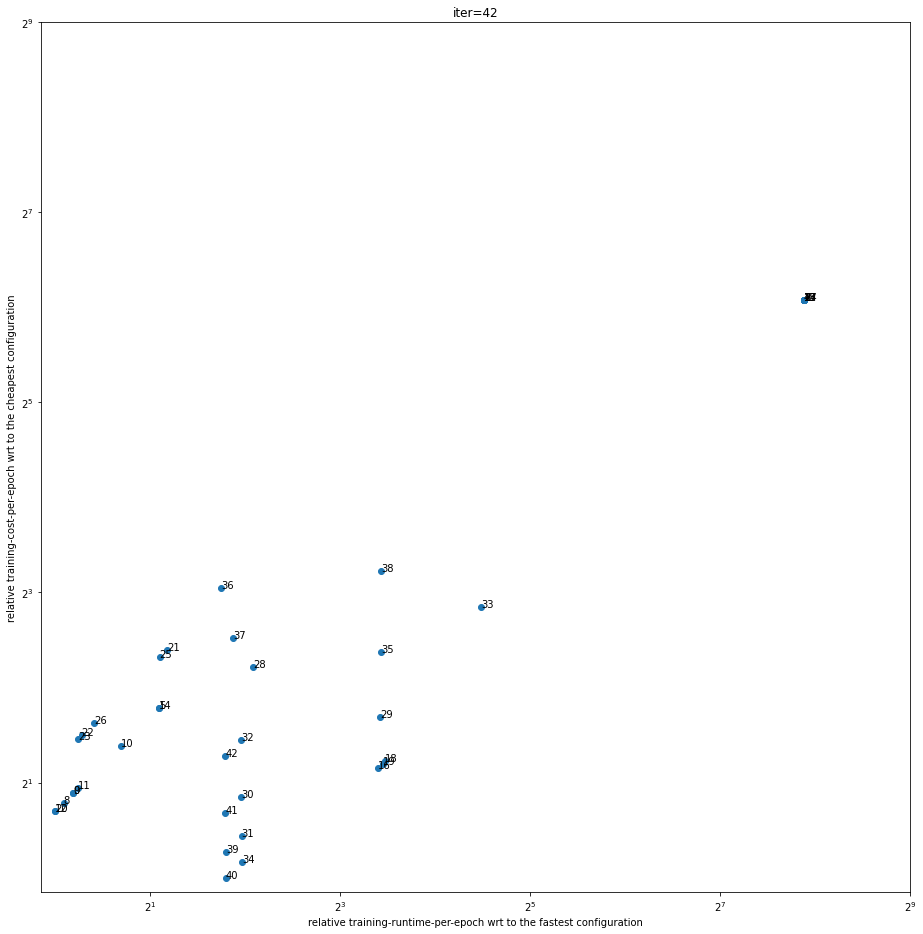

In [399]:
dfff.results["training-runtime-per-sample2"] = (
    dfff.results["training-runtime-per-sample"] / dfff.results["training-runtime-per-sample"].min())
dfff.results["training-cost-per-sample2"] = (
    dfff.results["training-cost-per-sample"] / dfff.results["training-cost-per-sample"].min())

# for i in range(len(dfff.results)):
    # plot itself
fig, ax = plt.subplots(figsize=(16,16))

ax.scatter(dfff.results["training-runtime-per-sample2"][:i+1], dfff.results["training-cost-per-sample2"][:i+1])

ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

for i, row in dfff.results.iterrows():
    ax.annotate(f"{i}", (row["training-runtime-per-sample2"], row["training-cost-per-sample2"]), rotation=0)


# dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
# ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

ax.set_ylim([0.9, 512.])
ax.set_xlim([0.9, 512.])
ax.set_aspect('equal')
#     plt.legend(title='Instance type family', loc=4)

fig.patch.set_facecolor('white')
ax.set_title(f'iter={i}')

In [158]:
# dfff.results["training-runtime-per-sample2"] = (
#     dfff.results["training-runtime-per-sample"] / dfff.results["training-runtime-per-sample"].min())
# dfff.results["training-cost-per-sample2"] = (
#     dfff.results["training-cost-per-sample"] / dfff.results["training-cost-per-sample"].min())

# for i in range(len(dfff.results)):
#     # plot itself
#     fig, ax = plt.subplots(figsize=(16,16))

#     ax.scatter(dfff.results["training-runtime-per-sample2"][:i+1], dfff.results["training-cost-per-sample2"][:i+1])

#     ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
#     ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

#     ax.set_yscale('log', base=2)
#     ax.set_xscale('log', base=2)

#     for j, row in dfff.results[:i+1].iterrows():
#         ax.annotate(f"{j}", (row["training-runtime-per-sample2"], row["training-cost-per-sample2"]), rotation=0)


#     # dfrt = dfr[is_pareto_efficient(dfr.loc[:,['st_worker_cost', 'st_worker_time']].to_numpy())]
#     # ax.scatter(dfrt.st_worker_time, dfrt.st_worker_cost, color='k')

#     ax.set_ylim([0.9, 512.])
#     ax.set_xlim([0.9, 512.])
#     ax.set_aspect('equal')
# #     plt.legend(title='Instance type family', loc=4)

#     fig.patch.set_facecolor('white')
#     ax.set_title(f'iter={i}')

# DeepAR dataset generation temp

In [36]:
import sys
import importlib

sys.path.insert(0, '/Users/awgol/code/syne-tune/')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

from syne_tune.util import experiment_path, s3_experiment_path
importlib.reload(syne_tune.util)

import adam_scripts.utils
importlib.reload(adam_scripts.utils)

import pygmo

import numpy as np
import pandas as pd
import tqdm
import boto3

from syne_tune.backend.sagemaker_backend.instance_info import InstanceInfos
instance_info = InstanceInfos()

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib

import pickle

In [37]:
boto3_client_sagemaker = boto3.client('sagemaker')
boto3_resource_cloudwatch = boto3.resource('cloudwatch')

In [38]:
tuner_name = 'deepar-speed-bs-32-2022-04-21-14-48-44-131' 
# tuner_name = 'deepar-speed-bs-128-prev-2022-04-22-10-39-41-225'
df = syne_tune.experiments.load_experiment(
    tuner_name, 
    force_download=False
).results

In [39]:
df

,epoch_no,epoch_loss,mean_wQuantileLoss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,...,config_dataset,config_epochs,config_lr,config_num_cells,config_num_layers,config_only_benchmark_speed,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,st_tuner_time
0,1,7.960658,0.747286,1.650553e+09,60.583000,0.016021,0,CONTINUE,InProgress,3,...,electricity,100,0.0001,1,1,1,/opt/ml/checkpoints,1,ml.c5.4xlarge,239.007229
1,1,7.960658,0.747280,1.650553e+09,68.079488,0.121995,0,CONTINUE,InProgress,8,...,electricity,100,0.0001,1,1,1,/opt/ml/checkpoints,1,ml.m5.24xlarge,292.434572
2,1,7.960658,0.747309,1.650553e+09,80.098269,0.012393,0,CONTINUE,InProgress,0,...,electricity,100,0.0001,1,1,1,/opt/ml/checkpoints,1,ml.c4.2xlarge,292.441039
3,1,8.224527,0.924519,1.650553e+09,82.592995,0.024663,0,CONTINUE,InProgress,9,...,electricity,100,0.0001,1,4,1,/opt/ml/checkpoints,1,ml.m5.4xlarge,292.441090
4,1,7.920922,0.584266,1.650553e+09,77.517351,0.047953,0,CONTINUE,InProgress,1,...,electricity,100,0.0001,1,4,1,/opt/ml/checkpoints,1,ml.m4.2xlarge,292.441121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2,8.341983,1.076656,1.650555e+09,1906.226287,0.070954,1,CONTINUE,InProgress,95,...,electricity,100,0.0001,150,4,1,/opt/ml/checkpoints,1,ml.m5.large,2292.516365
626,2,8.240745,0.946264,1.650555e+09,1093.111278,0.072267,1,CONTINUE,InProgress,231,...,electricity,100,0.0001,200,4,1,/opt/ml/checkpoints,1,ml.c5.xlarge,2332.178510
627,2,8.245433,0.949949,1.650555e+09,1215.664090,0.090837,1,CONTINUE,InProgress,223,...,electricity,100,0.0001,200,4,1,/opt/ml/checkpoints,1,ml.m5.xlarge,2357.266591
628,2,8.242390,0.945897,1.650555e+09,1596.702724,0.123744,1,CONTINUE,InProgress,136,...,electricity,100,0.0001,200,4,1,/opt/ml/checkpoints,1,ml.c4.xlarge,2393.669506


In [40]:
# Compute time per samples
dfg = df.groupby(['trial_id'])

number_of_samples_processed = \
  (dfg.st_worker_iter.max() - dfg.st_worker_iter.min()) * \
  dfg.config_st_instance_type.max().map(lambda x: instance_info(x).num_gpu)

number_of_samples_processed = dfg.config_batch_size.max()

samples_processed_per_second = number_of_samples_processed / (dfg.st_worker_time.max()-dfg.st_worker_time.min())
time_per_sample = (dfg.st_worker_time.max() - dfg.st_worker_time.min()) / number_of_samples_processed
cost_per_sample = time_per_sample * dfg.config_st_instance_type.max().map(lambda x: instance_info(x).cost_per_hour)


b = pd.concat([
    samples_processed_per_second, 
    time_per_sample,
    cost_per_sample,
    dfg.st_worker_cost.max(), 
    dfg.config_st_instance_type.max(), 
    dfg.config_num_cells.max(), 
    dfg.config_num_layers.max(), 
], axis=1)
columns = ['samples_processed_per_second', 'time_per_sample', 'cost_per_sample']
b.columns = columns + list(b.columns)[len(columns):]

In [41]:
# c = b

# c['time_per_sample_orig'] = c['time_per_sample']
# c['cost_per_sample_orig'] = c['cost_per_sample']

# c['time_per_sample'] = c['time_per_sample'] / c['time_per_sample'].min()
# c['cost_per_sample'] = c['cost_per_sample'] / c['cost_per_sample'].min()

In [42]:
dfl = b.query('config_num_cells == 200 & config_num_layers == 4')
dfs = b.query('config_num_cells == 50 & config_num_layers == 1')

# dfs['time_per_sample'] /= dfs['time_per_sample'].min()
# dfs['cost_per_sample'] /= dfs['cost_per_sample'].min()
# dfl['time_per_sample'] /= dfl['time_per_sample'].min()
# dfl['cost_per_sample'] /= dfl['cost_per_sample'].min()

dfs['time_per_sample'] /= b['time_per_sample'].min()
dfs['cost_per_sample'] /= b['cost_per_sample'].min()
dfl['time_per_sample'] /= b['time_per_sample'].min()
dfl['cost_per_sample'] /= b['cost_per_sample'].min()

dfl = dfl.drop(index=dfl.iloc[dfl.cost_per_sample.argmin()].name)

/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/awgol/libs/miniconda3/envs/aws1/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [43]:
dfl = dfl.drop(index=dfl.iloc[dfl.cost_per_sample.argmin()].name)

In [44]:
colormap_name = 'Set1'

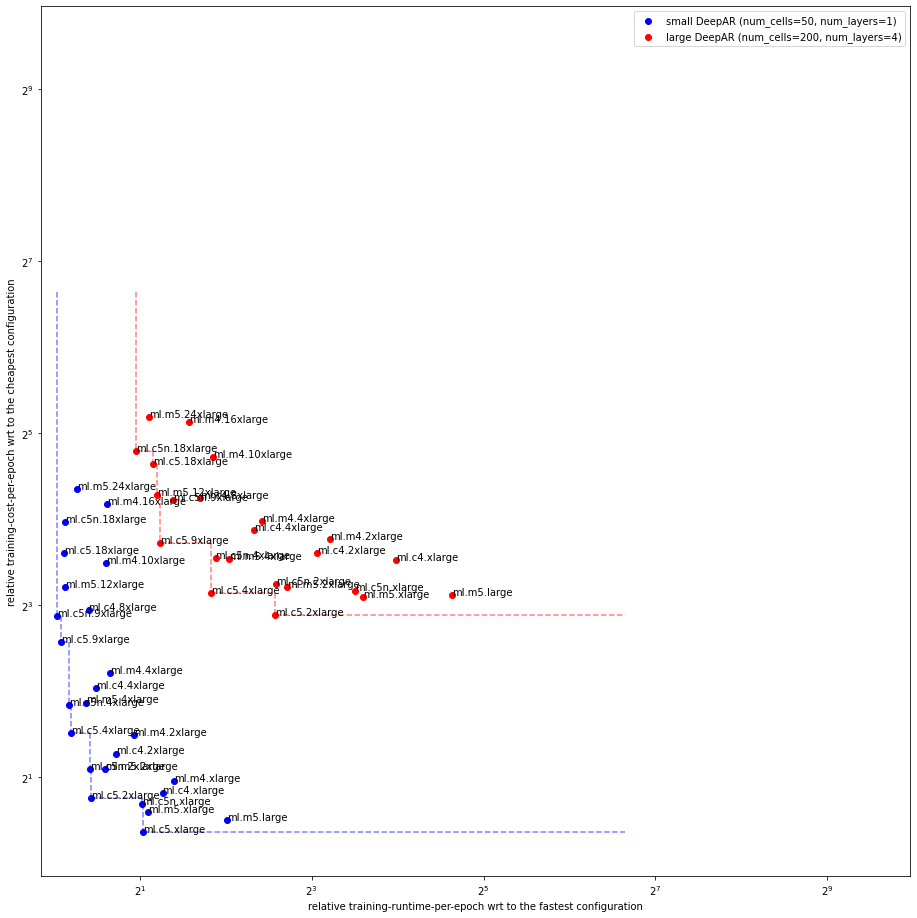

In [45]:
fig, ax = plt.subplots(figsize=(16,16))

cmap_colors = plt.get_cmap(colormap_name).colors

instance_types = list(set(x.split('.')[1] for x in df.config_st_instance_type.unique()))
instance_types.sort()
colors_dict = {v: cmap_colors[i] for i, v in enumerate(instance_types)}

ax.scatter(dfs.time_per_sample, dfs.cost_per_sample, color='b',
               label='small DeepAR (num_cells=50, num_layers=1)')
ax.scatter(dfl.time_per_sample, dfl.cost_per_sample, color='r', 
           label='large DeepAR (num_cells=200, num_layers=4)')

for i, row in dfs.iterrows():
    ax.annotate(f"{row.config_st_instance_type}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)
for i, row in dfl.iterrows():
    ax.annotate(f"{row.config_st_instance_type}", 
                (row.time_per_sample, row.cost_per_sample), rotation=0)


temp = (dfs[
    is_pareto_efficient(dfs.loc[:,['time_per_sample', 'cost_per_sample']].to_numpy())]
        .loc[:,['time_per_sample', 'cost_per_sample']]
        .to_numpy())
temp = temp[temp[:, 0].argsort()]
xs = temp[:, 0].tolist()
ys = temp[:, 1].tolist()
plot_pareto_front_given_points(xs=xs, ys=ys, ax=ax, 
                               color='b', linestyle='--', alpha=0.5)

temp = (dfl[
    is_pareto_efficient(dfl.loc[:,['time_per_sample', 'cost_per_sample']].to_numpy())]
        .loc[:,['time_per_sample', 'cost_per_sample']]
        .to_numpy())
temp = temp[temp[:, 0].argsort()]
xs = temp[:, 0].tolist()
ys = temp[:, 1].tolist()
plot_pareto_front_given_points(xs=xs, ys=ys, ax=ax, 
                               color='r', linestyle='--', alpha=0.5)


ax.set_xlabel('relative training-runtime-per-epoch wrt to the fastest configuration')
ax.set_ylabel('relative training-cost-per-epoch wrt to the cheapest configuration')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

ax.set_ylim([0.9, 1000.])
ax.set_xlim([0.9, 1000.])
ax.set_aspect('equal')

fig.patch.set_facecolor('white')

_ = ax.legend()

with open('deepar-gluonts-fig-pareto.pickle', 'wb') as handle:
    pickle.dump(fig, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Estimate SCRIPT_SETUP_OVERHEAD_TIME

In [160]:
# 1. determine a set of jobs that have a Syne Tune log record right at the very end of the traning,
# e.g., the speed benchmark jobs for gluonts: 
# 2. check the billable time
# 3. subtract one from the other to get the startup time

In [168]:
from sagemaker import TrainingJobAnalytics
import syne_tune.experiments
import boto3
import pandas as pd
import tqdm
import matplotlib

sagemaker_boto3 = boto3.client('sagemaker')

In [213]:
tuner_name = 'deepar-speed-bs-32-2022-04-21-14-48-44-131'
tuner_name = 'loss-lr-wd-bs-2-2022-02-07-23-13-30-781'

df = syne_tune.experiments.load_experiment(
    tuner_name, 
    force_download=False
).results

In [216]:
df.config_per_device_train_batch_size.unique()

array([ 2,  4, 16, 12,  8])

In [192]:
sagemaker_boto3 = boto3.client('sagemaker')

temp = df.groupby('trial_id').st_worker_time.max()

estimates = []

for trial_id in tqdm.tqdm(df.trial_id.unique()):
    job_name = f'{tuner_name}-{trial_id}'
    job_details = sagemaker_boto3.describe_training_job(TrainingJobName=job_name)
    

    estimates.append((job_details['BillableTimeInSeconds'], temp[trial_id]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.98it/s]


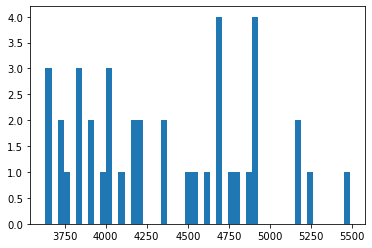

In [197]:
plt.hist([a for a, b in estimates], bins=50);

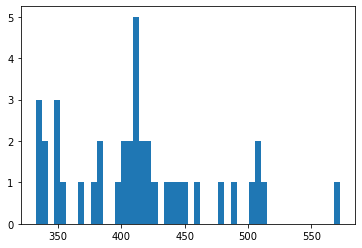

In [196]:
plt.hist([a-b for a, b in estimates], bins=50);

In [195]:
np.mean([a-b for a, b in estimates]), np.median([a-b for a, b in estimates])

(414.16648222259994, 409.9398457519999)

# DeepAR blackbox

In [311]:
# speeds
a = [
#     'deepar-speed-bs-128-prev-2022-04-22-10-39-41-225',
    'deepar-speed-bs-32-2022-04-21-16-25-04-045',
    'deepar-speed-bs-32-2022-04-21-14-48-44-131',
]

In [312]:
[len(syne_tune.experiments.load_experiment(i).results) for i in a]

[826, 630]

In [317]:
df.columns.tolist()

['index',
 'epoch_no',
 'epoch_loss',
 'mean_wQuantileLoss',
 'st_worker_timestamp',
 'st_worker_time',
 'st_worker_cost',
 'st_worker_iter',
 'st_decision',
 'st_status',
 'trial_id',
 'config_batch_size',
 'config_dataset',
 'config_epochs',
 'config_lr',
 'config_num_cells',
 'config_num_layers',
 'config_only_benchmark_speed',
 'config_st_checkpoint_dir',
 'config_st_instance_count',
 'config_st_instance_type',
 'st_tuner_time']

In [313]:
dfs_to_concat = list()
trial_id_max = -1
for tuner_job_name in a:
    df_temp = syne_tune.experiments.load_experiment(tuner_job_name).results
    df_temp['trial_id'] += trial_id_max + 1
    trial_id_max = df_temp['trial_id'].max()
    dfs_to_concat.append(df_temp)
dfa = pd.concat(dfs_to_concat).reset_index()

In [314]:
dfa.config_batch_size.unique()

array([32])

In [318]:
dfa.config_num_cells.unique()

array([  1,  50, 100, 150, 200])

In [319]:
dfa.config_num_layers.unique()

array([1, 4])

In [387]:
dfa.config_lr.unique()

array([0.0001])

In [405]:
# learning curves
b = [
    'deepar-curves-2022-04-25-10-46-32-616',
    'deepar-curves-2-2022-04-25-12-31-30-154',
    'deepar-curves-3-2022-04-25-12-32-14-346',
#     'deepar-curves-4-2022-05-04-08-53-23-418',
#     # There was no deepar-curves-5
#     'deepar-curves-6-2022-05-04-08-54-35-102',
]

In [361]:
[len(syne_tune.experiments.load_experiment(i).results) for i in b]

[1595, 830, 829]

In [362]:
dfs_to_concat = list()
trial_id_max = -1
for tuner_job_name in b:
    df_temp = syne_tune.experiments.load_experiment(tuner_job_name).results
    df_temp['trial_id'] += trial_id_max + 1
    trial_id_max = df_temp['trial_id'].max()
    dfs_to_concat.append(df_temp)
df = pd.concat(dfs_to_concat).reset_index()

In [381]:
temp = df.groupby(['trial_id', 'st_worker_iter']).mean_wQuantileLoss.count().reset_index()
trial_ids_with_duplicates = set(temp[temp.mean_wQuantileLoss > 1].trial_id.unique())

trial_ids_with_all_iters = set(df[df.epoch_no == 100].trial_id.unique())
trial_ids_to_keep = (trial_ids_with_all_iters.difference(trial_ids_to_be_deleted.tolist()))

In [382]:
df.drop(df.index[~df['trial_id'].isin(trial_ids_to_keep)], inplace=True)

In [389]:
df.trial_id.nunique()

17

In [404]:
# there multiple runs with exactly the same settings because the np.seed was fixed

In [403]:
df[(df.st_worker_iter == 0)]

,index,epoch_no,epoch_loss,mean_wQuantileLoss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_batch_size,config_dataset,config_epochs,config_lr,config_num_cells,config_num_layers,config_only_benchmark_speed,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,st_tuner_time
0,0,1,5.666997,0.097809,1.650884e+09,220.189621,0.029114,0,CONTINUE,InProgress,5,32,electricity,100,0.078591,18,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,375.802559
1,1,1,5.178132,0.124752,1.650884e+09,304.296882,0.040235,0,CONTINUE,InProgress,8,64,electricity,100,0.006268,82,1,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,490.023285
2,2,1,5.098028,0.070787,1.650884e+09,346.902907,0.045868,0,CONTINUE,InProgress,0,32,electricity,100,0.003162,100,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,526.124168
3,3,1,5.231679,0.070269,1.650884e+09,361.404500,0.047786,0,CONTINUE,InProgress,6,32,electricity,100,0.000262,105,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,526.131751
4,4,1,10.981503,9.588141,1.650884e+09,434.468690,0.057446,0,CONTINUE,InProgress,3,32,electricity,100,0.096288,75,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,573.391704
8,8,1,5.273958,0.076446,1.650885e+09,681.269772,0.090079,0,CONTINUE,InProgress,7,128,electricity,100,0.010070,89,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,846.566270
675,675,1,5.150497,0.075702,1.650921e+09,498.049237,0.065853,0,CONTINUE,InProgress,13,64,electricity,100,0.000391,107,2,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,36709.848505
852,852,1,5.759104,0.178181,1.650932e+09,330.386098,0.043684,0,CONTINUE,InProgress,14,32,electricity,100,0.040508,28,4,0,/opt/ml/checkpoints,1,ml.c5.2xlarge,48432.963431
1595,0,1,5.661894,0.129030,1.650891e+09,302.720057,0.020013,0,CONTINUE,InProgress,21,32,electricity,100,0.078591,18,2,0,/opt/ml/checkpoints,1,ml.c5.xlarge,468.390108
1596,1,1,5.243087,0.134488,1.650891e+09,464.233497,0.030691,0,CONTINUE,InProgress,24,64,electricity,100,0.006268,82,1,0,/opt/ml/checkpoints,1,ml.c5.xlarge,631.744183


In [384]:
df.config_batch_size.unique()

array([ 32,  64, 128])

In [385]:
df.config_num_cells.unique()

array([ 18,  82, 100, 105,  75,  89, 107,  28,  35,  53])

In [386]:
df.config_num_layers.unique()

array([2, 1, 4])

In [388]:
df.config_lr.unique()

array([0.07859062, 0.00626841, 0.00316228, 0.00026199, 0.09628793,
       0.01006991, 0.00039067, 0.04050819, 0.00352503, 0.08526964])

In [355]:
trial_ids_to_keep = dfa[df.epoch_no == 100].trial_id.unique().tolist()

In [303]:
trial_ids_to_keep = df[(df.mean_wQuantileLoss > 1.)].trial_id.unique().tolist()

In [304]:
trial_ids_to_keep

[3, 12, 11, 19, 17, 28, 27, 33, 31]

<AxesSubplot:xlabel='st_worker_iter', ylabel='mean_wQuantileLoss'>

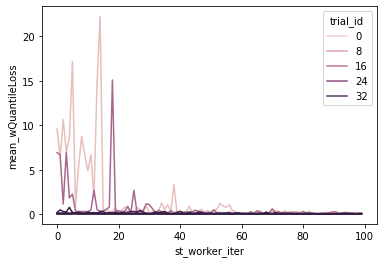

In [358]:
# tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
sns.lineplot(data=df.query('trial_id in @trial_ids_to_keep'), 
             hue="trial_id", x="st_worker_iter", y="mean_wQuantileLoss")

<AxesSubplot:xlabel='st_worker_iter', ylabel='epoch_loss'>

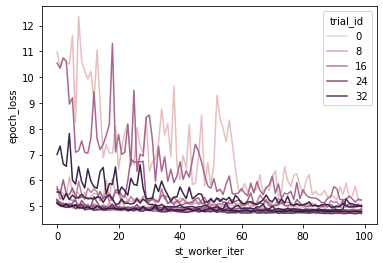

In [359]:
# tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
sns.lineplot(data=df.query('trial_id in @trial_ids_to_keep'), 
             hue="trial_id", x="st_worker_iter", y="epoch_loss")

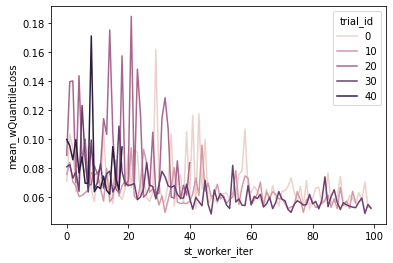

In [342]:
# tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
a = sns.lineplot(data=df.query('trial_id%10==0'), 
                 hue="trial_id", x="st_worker_iter", 
#                  y="epoch_loss", 
                 y="mean_wQuantileLoss", 
                )
# a.set_yscale('log')

In [320]:
aa = syne_tune.experiments.load_experiment('train-gluonts-2022-05-03-14-39-41-624')

<AxesSubplot:xlabel='st_worker_iter', ylabel='mean_wQuantileLoss'>

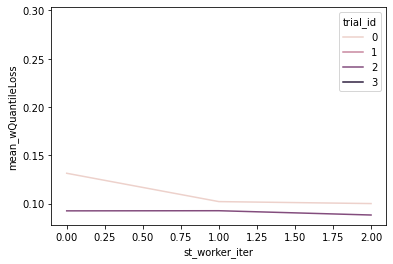

In [325]:
# tuning_experiment = syne_tune.experiments.load_experiment('distilbert-on-imdb-2022-02-01-19-40-16-594')
sns.lineplot(data=aa.results, 
             hue="trial_id", x="st_worker_iter", y="mean_wQuantileLoss")

# temp

In [406]:
syne_tune.experiments.load_experiment('deepar-curves-4-2022-05-04-08-53-23-418').results.groupby('trial_id').st_worker_cost.max().sum()

219.44113580894074

In [407]:
syne_tune.experiments.load_experiment('deepar-curves-6-2022-05-04-08-54-35-102').results.groupby('trial_id').st_worker_cost.max().sum()

98.40577372119921